In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import plotly.express as px


In [2]:
super_store=pd.read_csv(r"C:\Users\compumarts\Downloads\final edit\superstore_sales (1).csv")
returns=pd.read_csv(r"C:\Users\compumarts\Downloads\final edit\returns (1).csv")
managers=pd.read_csv(r"C:\Users\compumarts\Downloads\final edit\managers.csv")

In [3]:
print(super_store.dtypes)

Row_ID                    int64
Order_ID                  int64
Order_Date               object
Order_Priority           object
Order_Quantity            int64
Sales                   float64
Discount                float64
Ship_Mode                object
Profit                  float64
Unit Price              float64
Shipping_Cost           float64
Customer_Name            object
City                     object
Zip_Code                  int64
State                    object
Region                   object
Customer_Segment         object
Product_Category         object
Product_Sub-Category     object
Product_Name             object
Product_Container        object
Product_Base_Margin     float64
dtype: object


In [3]:
super_store['Order_Date'] = pd.to_datetime(super_store['Order_Date'])


'Total Returns & orders and Profit and sales Percentages'

In [4]:
# Merge the tables based on 'Order_ID'
merged_data = pd.merge(super_store, returns, on='Order_ID', how='left')

# Calculate the required metrics
total_orders = merged_data['Order_ID'].nunique()
returned_orders = merged_data[merged_data['Status'] == 'Returned']['Order_ID'].nunique()
total_sales = merged_data['Sales'].sum()
returned_sales = merged_data[merged_data['Status'] == 'Returned']['Sales'].sum()
total_profit = merged_data['Profit'].sum()
returned_profit = merged_data[merged_data['Status'] == 'Returned']['Profit'].sum()

# Calculate the required percentages
return_order_percentage = (returned_orders / total_orders) * 100
return_sales_percentage = (returned_sales / total_sales) * 100
return_profit_percentage = (returned_profit / total_profit) * 100

# Create a summary table for the requested metrics
summary = pd.DataFrame({
    'Total Orders': [total_orders],
    'Returned Orders': [returned_orders],
    'Total Sales': [total_sales],
    'Returned Sales': [returned_sales],
    'Total Profit': [total_profit],
    'returned profit' :[returned_profit]
})
summary



Total Orders  Returned Orders   Total Sales  Returned Sales  Total Profit  \
0          5496              572  1.491560e+07    1.654854e+06  1.521768e+06   

   returned profit  
0    198432.939744

C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\765595097.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Metric', x='Value', data=summary_percentages, palette='coolwarm', ax=ax)


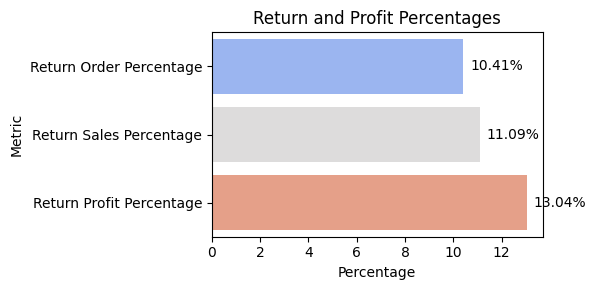

In [5]:
# Create a summary table for percentages
summary_percentages = pd.DataFrame({
    'Metric': ['Return Order Percentage', 'Return Sales Percentage', 'Return Profit Percentage'],
    'Value': [return_order_percentage, return_sales_percentage, return_profit_percentage]
})

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(y='Metric', x='Value', data=summary_percentages, palette='coolwarm', ax=ax)

# Adding text labels for each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}%", 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', 
                va='center', 
                xytext=(5, 0), 
                textcoords='offset points')

# Enhance the plot with titles and labels
ax.set_xlabel('Percentage')
ax.set_ylabel('Metric')
ax.set_title('Return and Profit Percentages')
plt.tight_layout()

# Show the plot
plt.show()

## "Products"


"Total Sales/Returned Sales/Net Sales by Product Category 
"

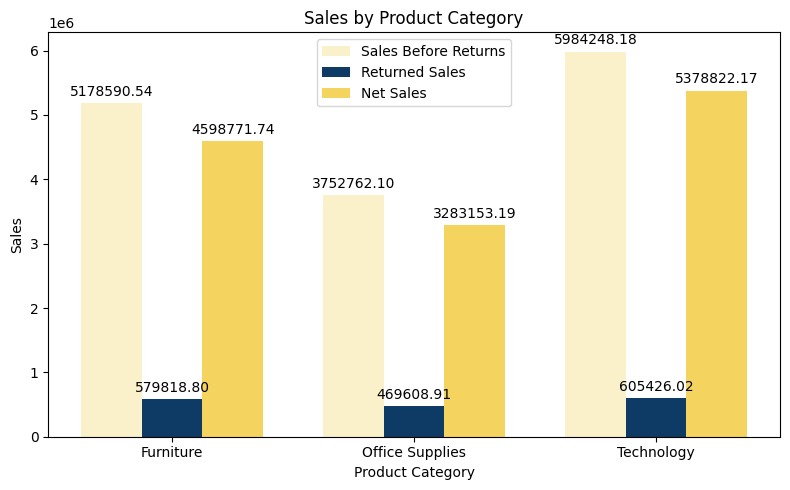

In [12]:
# Calculate sales by product category before deducting returns
sales_by_category_before = super_store.groupby('Product_Category')['Sales'].sum()

# Calculate returned sales by product category
returned_sales_by_category = merged_data[merged_data['Status'].notnull()].groupby('Product_Category')['Sales'].sum()

# Calculate net sales by product category after deducting returns
net_sales_by_category = sales_by_category_before - returned_sales_by_category

# Prepare data for the plot
categories = sales_by_category_before.index
sales_before = sales_by_category_before.values
returned_sales = returned_sales_by_category.values
net_sales = net_sales_by_category.values

# Plot
x = range(len(categories))
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
bar1 = ax.bar(x, sales_before, bar_width, label='Sales Before Returns', color='#FAF0CA')
bar2 = ax.bar([i + bar_width for i in x], returned_sales, bar_width, label='Returned Sales', color='#0D3B66')
bar3 = ax.bar([i + bar_width*2 for i in x], net_sales, bar_width, label='Net Sales', color='#F4D35E')

# Add labels and titles
ax.set_xlabel('Product Category')
ax.set_ylabel('Sales')
ax.set_title('Sales by Product Category')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Add labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()

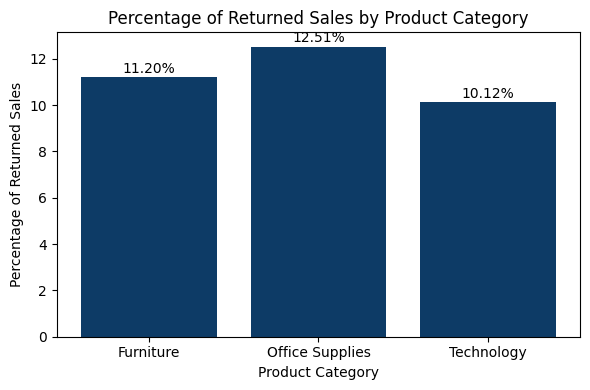

In [13]:
returns_percentage = (returned_sales_by_category / sales_by_category_before) * 100

# Prepare data for the plot
categories = returns_percentage.index
percentages = returns_percentage.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(categories, percentages, color='#0D3B66')  

# Adding labels and titles
ax.set_xlabel('Product Category')
ax.set_ylabel('Percentage of Returned Sales')
ax.set_title('Percentage of Returned Sales by Product Category')

# Adding labels on the bars
for i in range(len(percentages)):
    ax.text(i, percentages[i] + 0.2, f'{percentages[i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()

"orders quantities & avg unit price  for each product category"

In [10]:
# Calculate the quantity of orders for each product category
category_quantities = merged_data.groupby('Product_Category')['Order_Quantity'].sum().reset_index()

category_quantities

Product_Category  Order_Quantity
0        Furniture           44324
1  Office Supplies          118278
2       Technology           52175

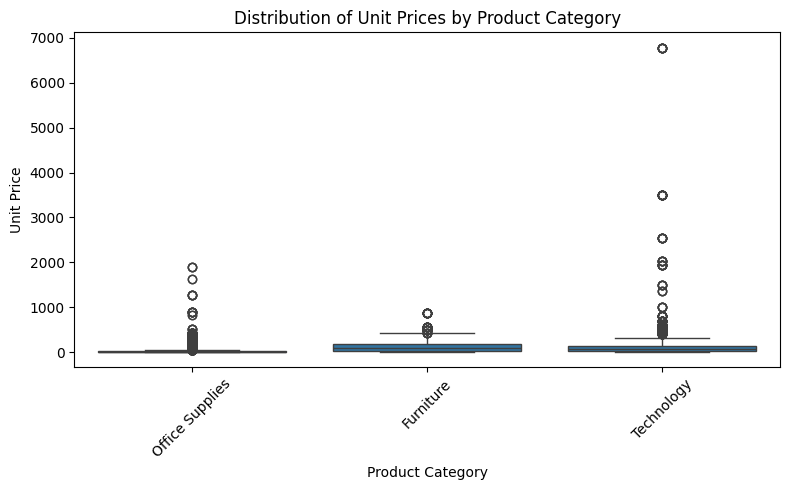

In [9]:
# Calculate the average unit price for each product category
average_unit_price = merged_data.groupby('Product_Category')['Unit Price'].mean().reset_index()

# Display the results
average_unit_price

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x='Product_Category', y='Unit Price')

# Plot settings
plt.title('Distribution of Unit Prices by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

 "Total Profit/Returned profit/Net Profit by Product Category "


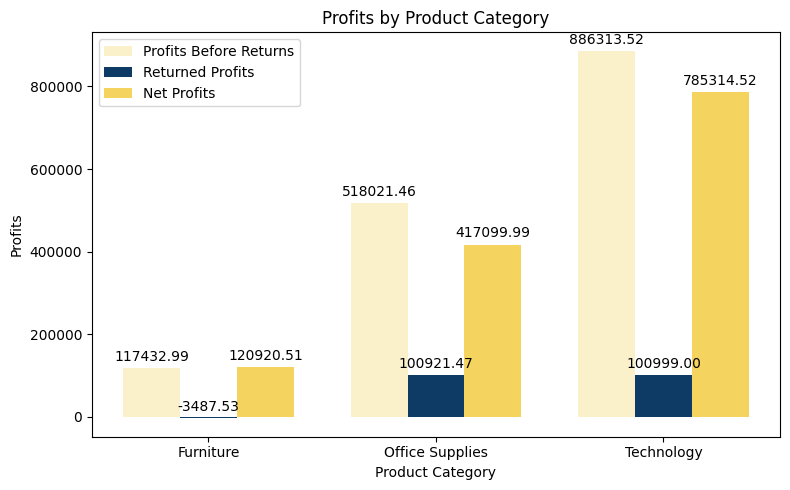

In [8]:
# Calculate profits by product category before deducting returns
profits_by_category_before = super_store.groupby('Product_Category')['Profit'].sum()

# Calculate returned profits by product category
returned_profits_by_category = merged_data[merged_data['Status'].notnull()].groupby('Product_Category')['Profit'].sum()

# Calculate net profits by product category after deducting returns
net_profits_by_category = profits_by_category_before - returned_profits_by_category

# Prepare data for the plot
categories = profits_by_category_before.index
profits_before = profits_by_category_before.values
returned_profits = returned_profits_by_category.values
net_profits = net_profits_by_category.values

# Plot
x = range(len(categories))
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
bar1 = ax.bar(x, profits_before, bar_width, label='Profits Before Returns', color='#FAF0CA')
bar2 = ax.bar([i + bar_width for i in x], returned_profits, bar_width, label='Returned Profits', color='#0D3B66')
bar3 = ax.bar([i + bar_width*2 for i in x], net_profits, bar_width, label='Net Profits', color='#F4D35E')

# Add labels and titles
ax.set_xlabel('Product Category')
ax.set_ylabel('Profits')
ax.set_title('Profits by Product Category')
ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Add labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()

"-Monthly & Annual- sales & profit for Product Category"

In [7]:
# Extract the year and month from the order date
merged_data['Year'] = pd.to_datetime(merged_data['Order_Date']).dt.year
merged_data['YearMonth'] = pd.to_datetime(merged_data['Order_Date']).dt.to_period('M')


In [14]:
# Calculate the annual sales for each category
annual_sales = merged_data.groupby(['Year', 'Product_Category'])['Sales'].sum().reset_index()

# Display the results
annual_sales


Year Product_Category         Sales
0   2017        Furniture  1.472672e+06
1   2017  Office Supplies  1.034642e+06
2   2017       Technology  1.701825e+06
3   2018        Furniture  1.252665e+06
4   2018  Office Supplies  8.998736e+05
5   2018       Technology  1.397142e+06
6   2019        Furniture  1.269661e+06
7   2019  Office Supplies  8.003490e+05
8   2019       Technology  1.366807e+06
9   2020        Furniture  1.183593e+06
10  2020  Office Supplies  1.017897e+06
11  2020       Technology  1.518474e+06

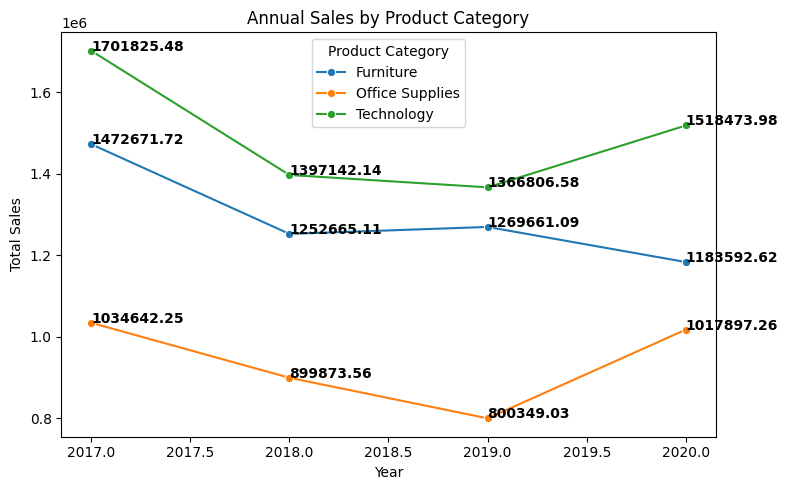

In [19]:
# Calculate the total sales for each category and year
total_sales = merged_data.groupby(['Year', 'Product_Category'])['Sales'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(8, 5))

# Draw the line plot
sns.lineplot(data=total_sales, x='Year', y='Sales', hue='Product_Category', marker='o')

# Add numbers on the line plot
for line in range(0, total_sales.shape[0]):
    plt.text(total_sales.Year[line], total_sales.Sales[line], round(total_sales.Sales[line], 2), 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

# Plot settings
plt.title('Annual Sales by Product Category')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

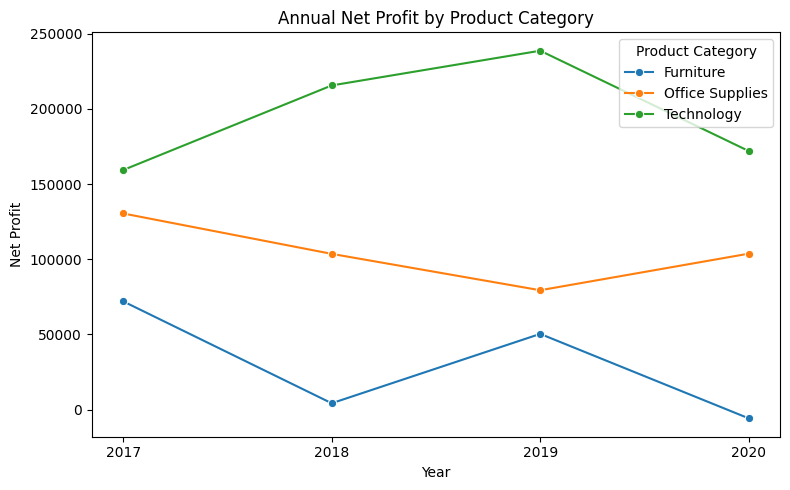

In [20]:
# Calculate the total profit for each category and year
total_profit = merged_data.groupby(['Year', 'Product_Category'])['Profit'].sum().reset_index()

# Filter the data to include only returned orders
returns = merged_data[merged_data['Status'] == 'Returned']

# Calculate the profit of returned orders for each category and year
returned_profit = returns.groupby(['Year', 'Product_Category'])['Profit'].sum().reset_index()

# Merge the total profit and returned profit dataframes
net_profit = pd.merge(total_profit, returned_profit, on=['Year', 'Product_Category'], how='left', suffixes=('_Total', '_Returned')).fillna(0)

# Calculate the net profit
net_profit['Net_Profit'] = net_profit['Profit_Total'] - net_profit['Profit_Returned']

# Plotting the data
plt.figure(figsize=(8, 5))

# Draw the line plot for net profit
sns.lineplot(data=net_profit, x='Year', y='Net_Profit', hue='Product_Category', marker='o')

# Plot settings
plt.title('Annual Net Profit by Product Category')
plt.xlabel('Year')
plt.ylabel('Net Profit')
plt.xticks(net_profit['Year'].unique())
plt.legend(title='Product Category')
plt.tight_layout()

# Show the plot
plt.show()

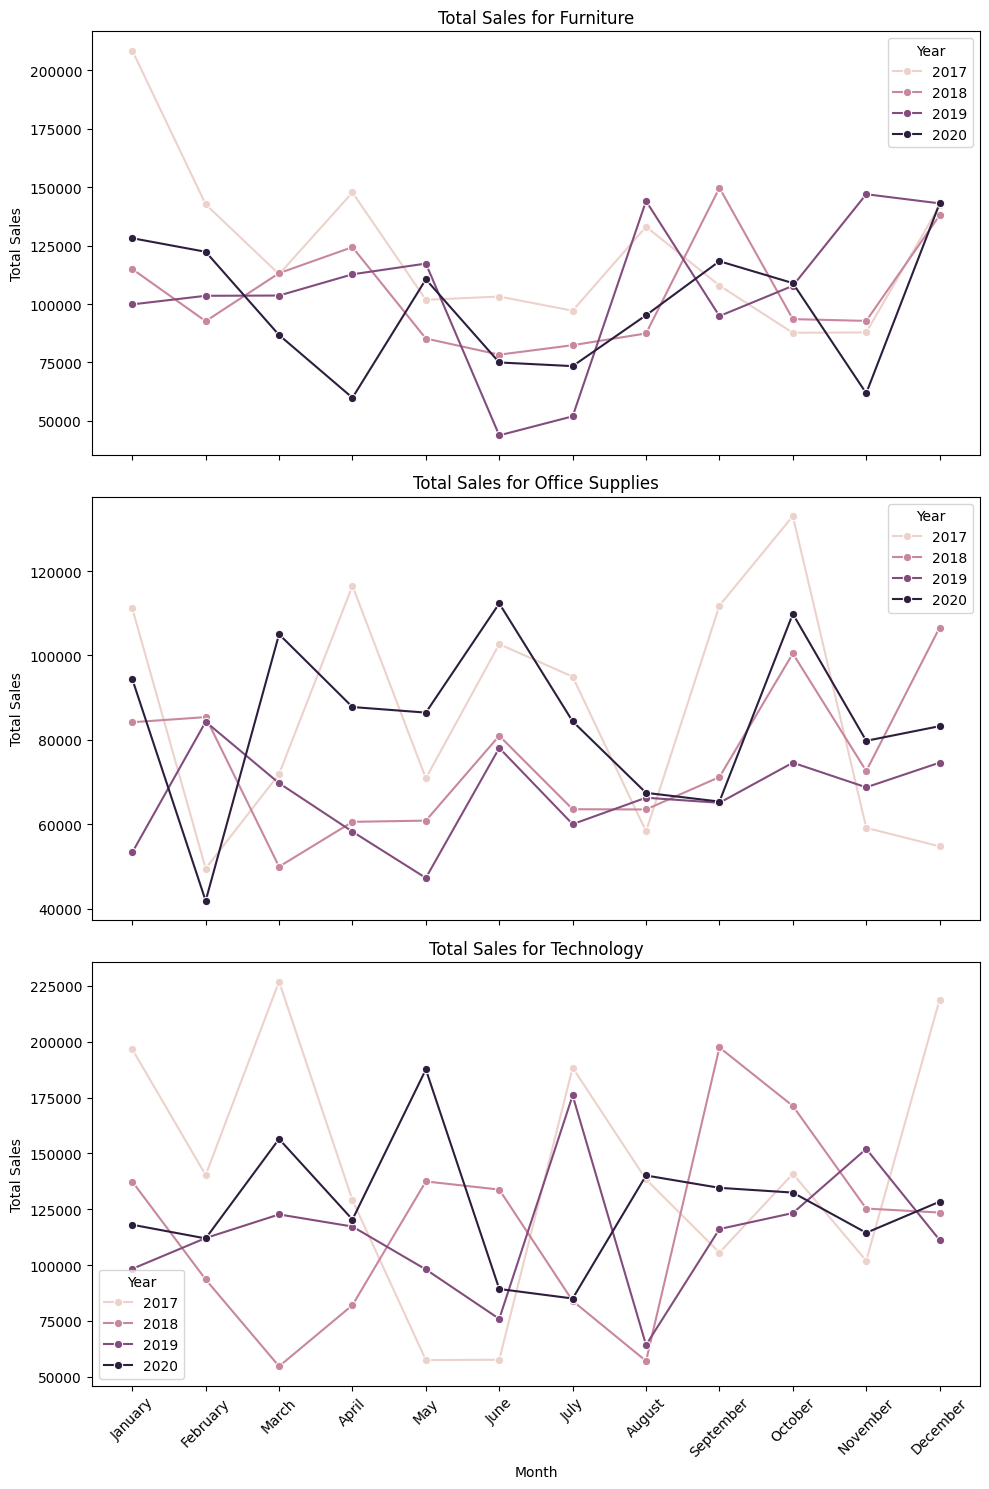

In [24]:
# Calculate the total sales for each category and month
total_monthly_sales = merged_data.groupby(['YearMonth', 'Product_Category'])['Sales'].sum().reset_index()

# Convert YearMonth to datetime for plotting
total_monthly_sales['YearMonth'] = total_monthly_sales['YearMonth'].dt.to_timestamp()

# Add columns for year and month to ease plotting
total_monthly_sales['Year'] = total_monthly_sales['YearMonth'].dt.year
total_monthly_sales['Month'] = total_monthly_sales['YearMonth'].dt.strftime('%B')

# Get the unique product categories
product_categories = total_monthly_sales['Product_Category'].unique()
num_categories = len(product_categories)

# Create subplots for each category
fig, axes = plt.subplots(num_categories, 1, figsize=(10, 5 * num_categories), sharex=True)

# Plot each category separately
for i, category in enumerate(product_categories):
    data = total_monthly_sales[total_monthly_sales['Product_Category'] == category]
    sns.lineplot(
        data=data,
        x='Month',
        y='Sales',
        hue='Year',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'Total Sales for {category}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Sales')
    axes[i].legend(title='Year')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

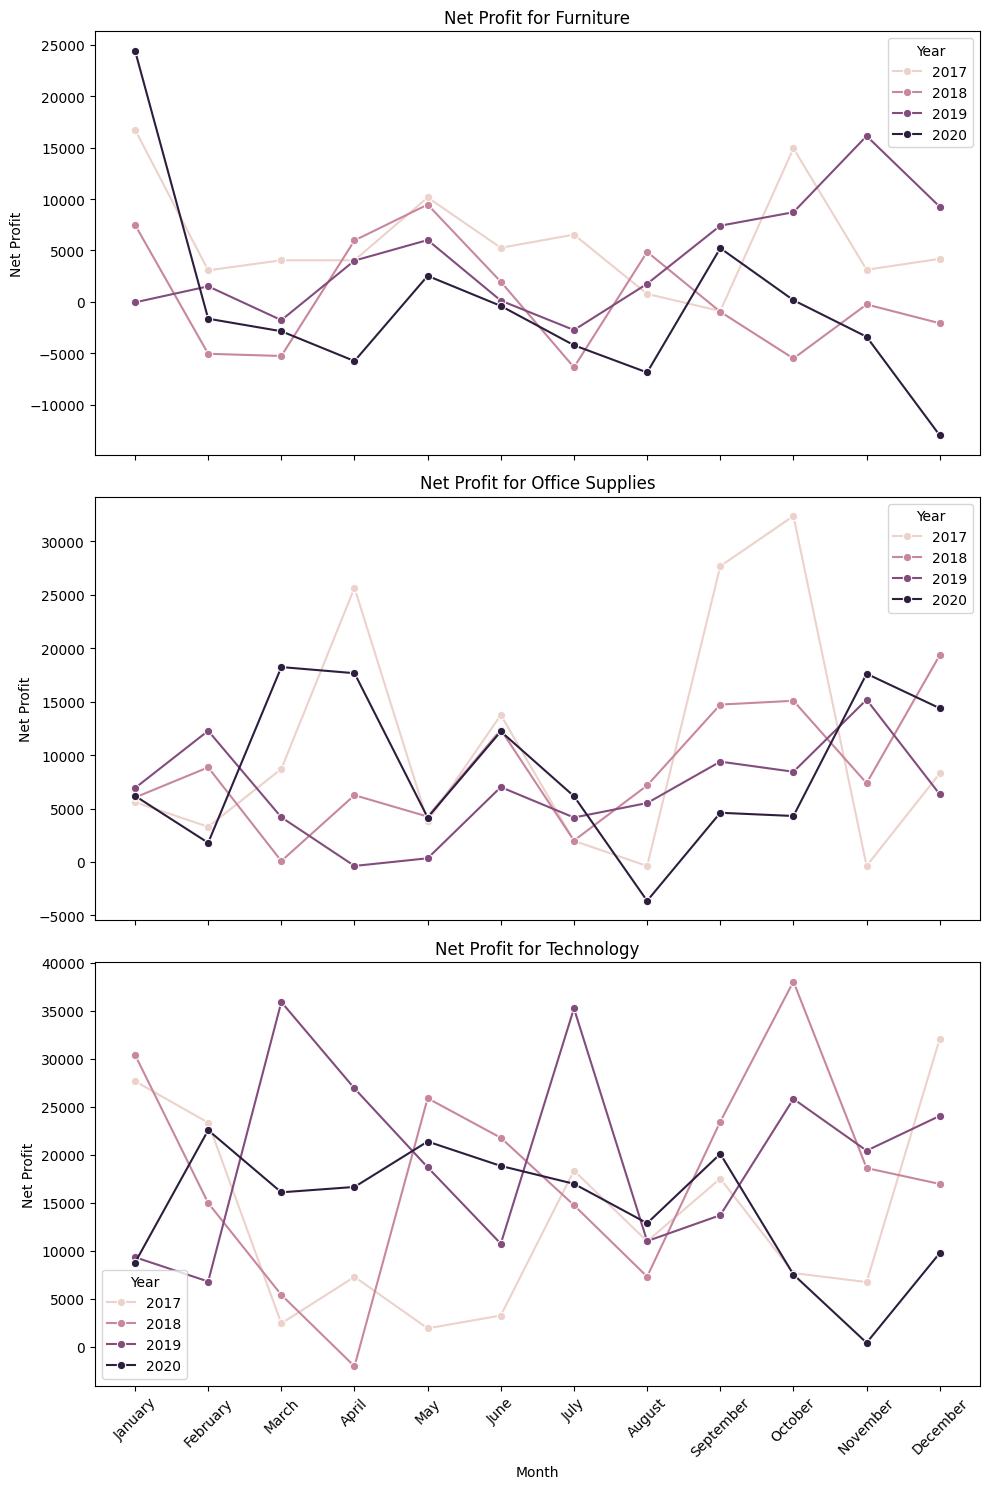

In [21]:
# Calculate the total profit for each category and month
total_monthly_profit = merged_data.groupby(['YearMonth', 'Product_Category'])['Profit'].sum().reset_index()

# Calculate the profit of returned orders for each category and month
returned_monthly_profit = returns.groupby(['YearMonth', 'Product_Category'])['Profit'].sum().reset_index()

# Merge the total profit and returned profit dataframes
net_monthly_profit = pd.merge(total_monthly_profit, returned_monthly_profit, on=['YearMonth', 'Product_Category'], how='left', suffixes=('_Total', '_Returned')).fillna(0)

# Calculate the net profit
net_monthly_profit['Net_Profit'] = net_monthly_profit['Profit_Total'] - net_monthly_profit['Profit_Returned']

# Convert YearMonth to datetime for plotting
net_monthly_profit['YearMonth'] = net_monthly_profit['YearMonth'].dt.to_timestamp()

# Add columns for year and month to ease plotting
net_monthly_profit['Year'] = net_monthly_profit['YearMonth'].dt.year
net_monthly_profit['Month'] = net_monthly_profit['YearMonth'].dt.month_name()

# Get the unique product categories
product_categories = net_monthly_profit['Product_Category'].unique()
num_categories = len(product_categories)

# Create subplots for each category
fig, axes = plt.subplots(num_categories, 1, figsize=(10, 5 * num_categories), sharex=True)

# Plot each category separately
for i, category in enumerate(product_categories):
    data = net_monthly_profit[net_monthly_profit['Product_Category'] == category]
    sns.lineplot(
        data=data, 
        x='Month', 
        y='Net_Profit', 
        hue='Year', 
        marker='o', 
        ax=axes[i]
    )
    axes[i].set_title(f'Net Profit for {category}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Net Profit')
    axes[i].legend(title='Year')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

"Net sales & Profit in regions by product category"

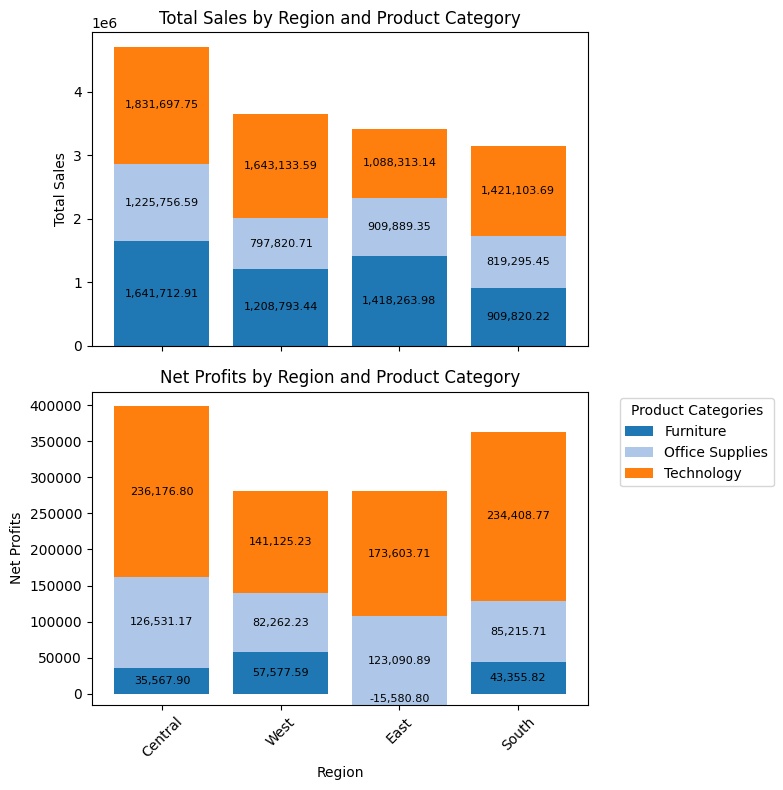

In [25]:
# Filter the data to include only returned orders
returns = merged_data[merged_data['Status'] == 'Returned']

# Calculate total profits by Region and Product Category before returns
profits_by_region_category = merged_data.groupby(['Region', 'Product_Category'])['Profit'].sum().unstack().fillna(0)

# Calculate returned profits by Region and Product Category
returned_profits_by_region_category = returns.groupby(['Region', 'Product_Category'])['Profit'].sum().unstack().fillna(0)

# Calculate net profits (after returns) by Region and Product Category
net_profits_by_region_category = profits_by_region_category - returned_profits_by_region_category

# Calculate total sales by Region and Product Category
sales_by_region_category = merged_data.groupby(['Region', 'Product_Category'])['Sales'].sum().unstack().fillna(0)

# Sort regions by total net sales
sorted_regions = sales_by_region_category.sum(axis=1).sort_values(ascending=False).index

# Prepare data for plotting
sorted_total_sales = sales_by_region_category.loc[sorted_regions]
sorted_net_profits = net_profits_by_region_category.loc[sorted_regions]
regions = sorted_total_sales.index
categories = sorted_total_sales.columns

# Plotting the data
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# Colors
colors = plt.cm.tab20.colors

# Plot stacked bar chart for net sales
bottom_sales = [0] * len(regions)
for i, category in enumerate(categories):
    bars = ax1.bar(regions, sorted_total_sales[category], bottom=bottom_sales, label=category, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:,.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     ha='center', va='center', fontsize=8, color='black')
    bottom_sales = [a + b for a, b in zip(bottom_sales, sorted_total_sales[category])]
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Region and Product Category')

# Plot stacked bar chart for net profits
bottom_profits = [0] * len(regions)
for i, category in enumerate(categories):
    bars = ax2.bar(regions, sorted_net_profits[category], bottom=bottom_profits, label=category, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:,.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     ha='center', va='center', fontsize=8, color='black')
    bottom_profits = [a + b for a, b in zip(bottom_profits, sorted_net_profits[category])]
ax2.set_xlabel('Region')
ax2.set_ylabel('Net Profits')
ax2.set_title('Net Profits by Region and Product Category')

# Add legend
ax2.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"Shipping Cost to Net Profit"

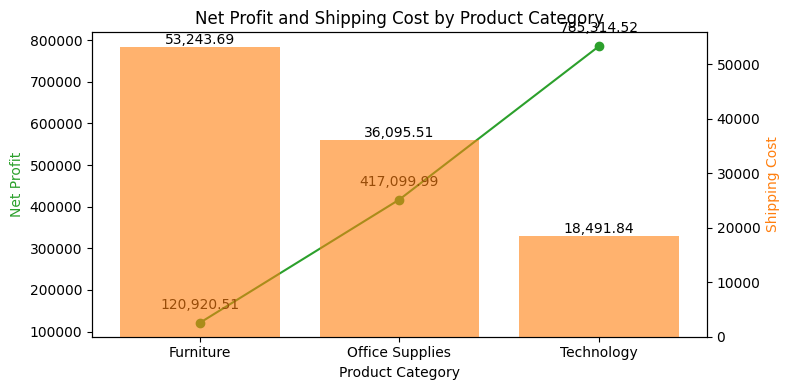

In [26]:
# Calculate net profits by product category after deducting returns
net_profits_by_category = merged_data[merged_data['Status'] != 'Returned'] \
    .groupby('Product_Category')['Profit'].sum()
# Calculate shipping cost by product category
shipping_cost_by_category = super_store.groupby('Product_Category')['Shipping_Cost'].sum()

# Create DataFrame for final sorted data
final_sales_profit_shipping_by_category_sorted = pd.DataFrame({
    'Product Category': profits_by_category_before.index,
    'Net Profit': net_profits_by_category.values,
    'Shipping Cost': shipping_cost_by_category.values
}).sort_values(by='Product Category')

# Plot data in a line and bar chart
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot line for net profits by category
ax1.plot(final_sales_profit_shipping_by_category_sorted['Product Category'], final_sales_profit_shipping_by_category_sorted['Net Profit'], marker='o', linestyle='-', color='#2ca02c', label='Net Profit')

# Plot bars for shipping cost by category
ax2 = ax1.twinx()
bars = ax2.bar(final_sales_profit_shipping_by_category_sorted['Product Category'], final_sales_profit_shipping_by_category_sorted['Shipping Cost'], alpha=0.6, color='#ff7f0e', label='Shipping Cost')

# Add numbers on points and bars
for i, txt in enumerate(final_sales_profit_shipping_by_category_sorted['Net Profit']):
    ax1.annotate(f'{txt:,.2f}', (final_sales_profit_shipping_by_category_sorted['Product Category'].iloc[i], final_sales_profit_shipping_by_category_sorted['Net Profit'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.2f}', ha='center', va='bottom', fontsize=10)

# Set plot settings
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Net Profit', color='#2ca02c')
ax2.set_ylabel('Shipping Cost', color='#ff7f0e')
plt.title('Net Profit and Shipping Cost by Product Category')
plt.xticks(rotation=45)
fig.tight_layout()

# Show plot
plt.show()

"Product_Sub-Category"

In [27]:
#filtered_data = merged_data[merged_data['Status'] != 'Returned']
category_subcategory_summary = merged_data.groupby(
    ['Product_Category', 'Product_Sub-Category']
).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order_ID', 'count')
).reset_index()

category_subcategory_summary

Product_Category            Product_Sub-Category  Total_Sales  \
0         Furniture                       Bookcases   822652.040   
1         Furniture              Chairs & Chairmats  1761836.550   
2         Furniture              Office Furnishings   698093.810   
3         Furniture                          Tables  1896008.142   
4   Office Supplies                      Appliances   736991.540   
5   Office Supplies  Binders and Binder Accessories  1022957.590   
6   Office Supplies                       Envelopes   174085.800   
7   Office Supplies                          Labels    38981.550   
8   Office Supplies                           Paper   446452.860   
9   Office Supplies             Pens & Art Supplies   167107.220   
10  Office Supplies                    Rubber Bands    15006.630   
11  Office Supplies   Scissors, Rulers and Trimmers    80996.310   
12  Office Supplies          Storage & Organization  1070182.600   
13       Technology            Computer Peripherals   795875.940   
14       Technology                 Copiers and Fax  1130361.300   
15       Technology                 Office Machines  2168697.140   
16       Technology    Telephones and Communication  1889313.802   

     Total_Profit  Order_Count  
0   -33582.133500          189  
1   149649.725000          386  
2   100427.924000          788  
3   -99062.529219          361  
4    97158.060000          434  
5   307413.418000          915  
6    48182.600000          246  
7    13677.170000          288  
8    45263.200000         1225  
9     7564.780000          633  
10    -102.670000          179  
11   -7799.250000          144  
12    6664.150000          546  
13   94287.480000          758  
14  167361.464000           87  
15  307712.930300          337  
16  316951.641000          883

"Sales vs Net Profit by Product Sub-Category"

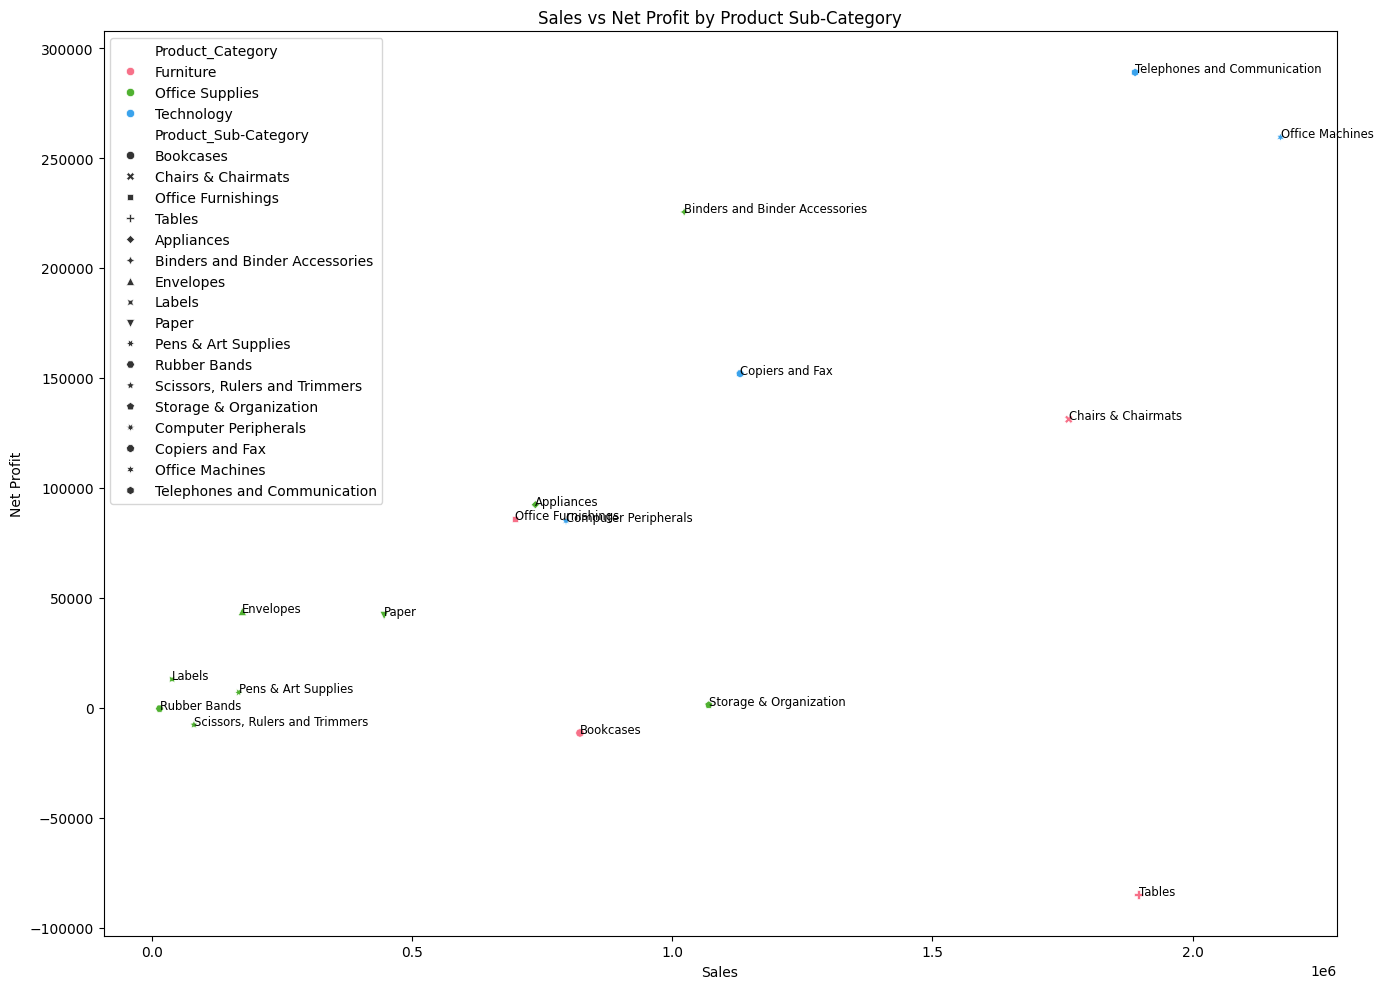

In [28]:
# Calculate the sales and net profit for each category and sub-category
category_summary = merged_data.groupby(['Product_Category', 'Product_Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Calculate returned sales and profit
returns_data = merged_data[merged_data['Status'] == 'Returned']
returns_summary = returns_data.groupby(['Product_Category', 'Product_Sub-Category']).agg({
    
    'Profit': 'sum'
}).reset_index()

# Merge the summary with returns to calculate net profit
final_summary = pd.merge(category_summary, returns_summary, on=['Product_Category', 'Product_Sub-Category'], how='left', suffixes=('', '_Returned'))

final_summary['Net_Profit'] = final_summary['Profit'] - final_summary['Profit_Returned'].fillna(0)

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot for sales vs net profit
sns.scatterplot(x='Sales', y='Net_Profit', hue='Product_Category', style='Product_Sub-Category', palette='husl', data=final_summary, ax=ax)

# Adding text labels for each point, moved slightly upwards
for line in range(0, final_summary.shape[0]):
    ax.text(final_summary.Sales[line], final_summary.Net_Profit[line] + 0.5,  # Adjust this value to move the label upwards
            final_summary['Product_Sub-Category'][line], horizontalalignment='left',
            size='small', color='black', weight='normal')

# Enhance the plot with titles and labels
ax.set_xlabel('Sales')
ax.set_ylabel('Net Profit')
ax.set_title('Sales vs Net Profit by Product Sub-Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

"Product Name"

"Top 10 Products by Sales and Profit"

In [29]:
# Exclude returned orders for sales and profit calculations
filtered_data = merged_data[merged_data['Status'] != 'Returned']

# Calculate total sales and total profit for each product
product_sales = merged_data.groupby('Product_Name').agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

product_profit = filtered_data.groupby('Product_Name').agg(
    Total_Profit=('Profit', 'sum')
).reset_index()

# Merge the sales and profit dataframes
product_sales_profit = pd.merge(product_sales, product_profit, on='Product_Name')

# Sort by total sales and get top 10 products
top_10 = product_sales_profit.sort_values(by='Total_Sales', ascending=False).head(10)

# Create bubble chart for top 10 products by sales and profit
fig = px.scatter(top_10, x='Total_Sales', y='Total_Profit',
                 size='Total_Sales', color='Product_Name',
                 hover_name='Product_Name',
                 title='Top 10 Products by Sales and Profit',
                 labels={'Total_Sales': 'Total Sales', 'Total_Profit': 'Total Profit'},
                 template='plotly_dark')

# Display the chart
fig.show()

"Sales & profits by Product Container
"

  Product_Container         Sales     Net_Profit
0         Jumbo Box  2.821295e+06  -64119.218526
1        Jumbo Drum  3.406070e+06  308112.573163
2         Large Box  2.072930e+06  104098.747700
3        Medium Box  6.948754e+05   82327.539900
4         Small Box  5.088967e+06  787433.752600
5        Small Pack  5.467971e+05   80205.995000
6          Wrap Bag  2.846671e+05   25275.630000


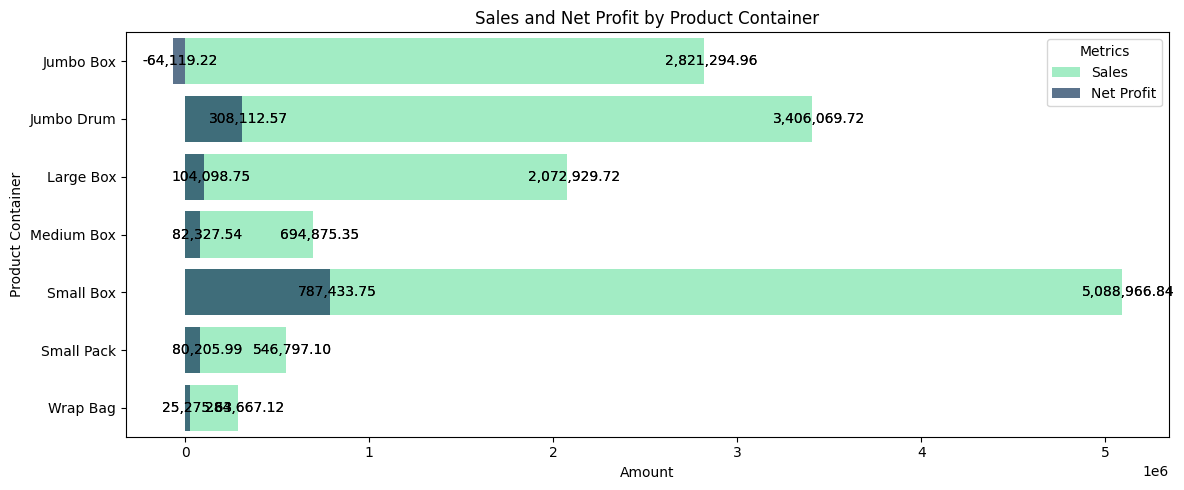

In [30]:
# Calculate the sales and net profit for each Product_Container
container_summary = merged_data.groupby('Product_Container').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Calculate net profit after deducting returns
returns_data = merged_data[merged_data['Status'] == 'Returned']
returns_summary = returns_data.groupby('Product_Container').agg({
    'Profit': 'sum'
}).reset_index()

container_summary = pd.merge(container_summary, returns_summary, on='Product_Container', how='left', suffixes=('', '_Returned'))
container_summary['Net_Profit'] = container_summary['Profit'] - container_summary['Profit_Returned'].fillna(0)

print(container_summary[['Product_Container', 'Sales', 'Net_Profit']])

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 5))

# Horizontal bar plot for sales
sns.barplot(y='Product_Container', x='Sales', data=container_summary, ax=ax, label='Sales', color='#95f9c3')

# Horizontal bar plot for net profit with some transparency
sns.barplot(y='Product_Container', x='Net_Profit', data=container_summary, ax=ax, label='Net Profit', color='#0b3866', alpha=0.7)

# Adding text labels for each bar
def add_numbers(ax, data, y_col, x_col):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), ',.2f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', 
                    va='center', 
                    xytext=(5, 0), 
                    textcoords='offset points')

add_numbers(ax, container_summary, 'Product_Container', 'Sales')
add_numbers(ax, container_summary, 'Product_Container', 'Net_Profit')

# Enhance the plot with titles and labels
ax.set_ylabel('Product Container')
ax.set_xlabel('Amount')
ax.set_title('Sales and Net Profit by Product Container')
ax.legend(title='Metrics')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# Filter data for "Jumbo Box"
jumbo_box_data = merged_data[merged_data['Product_Container'] == 'Jumbo Box']

# Calculate total sales and profit
jumbo_box_summary = jumbo_box_data.groupby('Product_Container').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Shipping_Cost': 'sum',
    'Order_Quantity': 'sum'
}).reset_index()

# Calculate returned sales, profit, and count of returned orders
returns_data = jumbo_box_data[jumbo_box_data['Status'] == 'Returned']
returns_summary = returns_data.groupby('Product_Container').agg({
    'Profit': 'sum',
}).reset_index()

# Merge summary data
jumbo_box_summary = pd.merge(jumbo_box_summary, returns_summary, on='Product_Container', how='left', suffixes=('', '_Returned'))
jumbo_box_summary['Net_Profit'] = jumbo_box_summary['Profit'] - jumbo_box_summary['Profit_Returned'].fillna(0)

# Display the summary as a table
jumbo_box_summary

Product_Container        Sales        Profit  Discount  Shipping_Cost  \
0         Jumbo Box  2821294.964 -74264.449582  0.048233        26825.3   

   Order_Quantity  Profit_Returned    Net_Profit  
0           13679    -10145.231056 -64119.218526

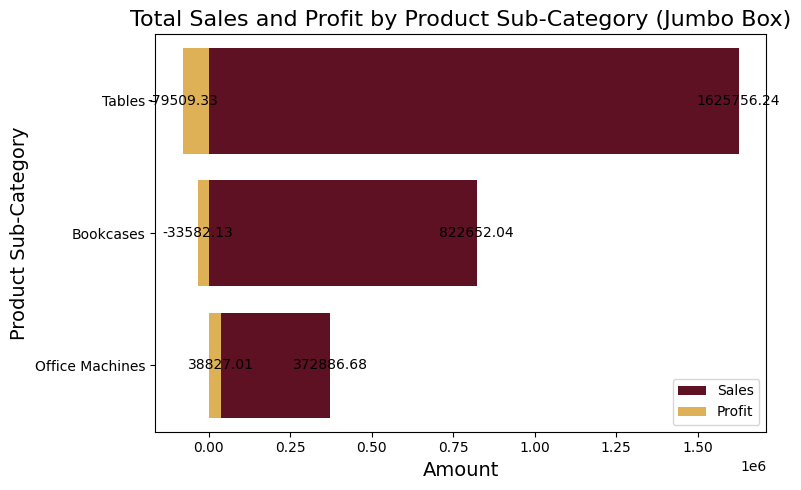

In [32]:
# Filter data to get only "Jumbo Box" containers
jumbo_box_data = merged_data[merged_data['Product_Container'] == 'Jumbo Box']

# Calculate total sales and total profit for each product category and sub-category with "Jumbo Box"
category_subcategory_summary_jumbo = jumbo_box_data.groupby(['Product_Category', 'Product_Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False)

# Plot total sales and profit for each product sub-category
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting bar chart for sales
sns.barplot(x='Sales', y='Product_Sub-Category', data=category_subcategory_summary_jumbo, color='#6a041d', label='Sales', ax=ax)

# Plotting bar chart for profit
sns.barplot(x='Profit', y='Product_Sub-Category', data=category_subcategory_summary_jumbo, color='#f5b841', label='Profit', ax=ax)

# Adding titles and labels
ax.set_title('Total Sales and Profit by Product Sub-Category (Jumbo Box)', fontsize=16)
ax.set_xlabel('Amount', fontsize=14)
ax.set_ylabel('Product Sub-Category', fontsize=14)
ax.legend()

# Adding numbers on the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='center', va='center', color='black')

# Formatting the plot
plt.tight_layout()
plt.show()

## "Customers"

"customers orders & retruns"

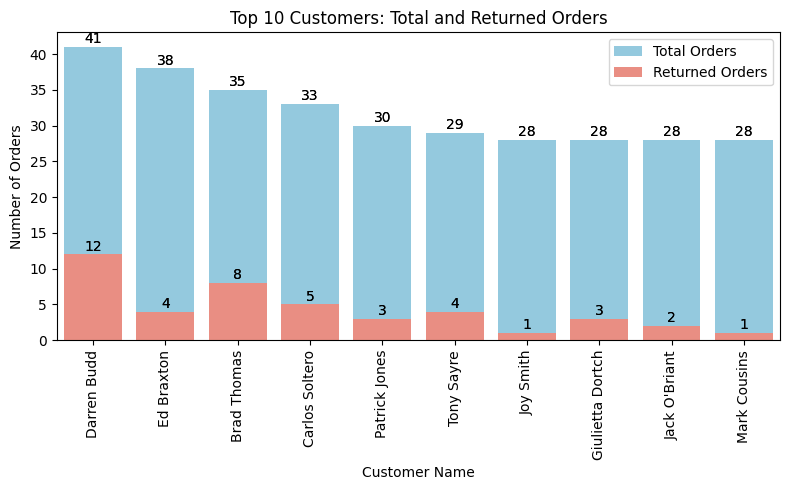

In [33]:
# Calculate the number of orders per customer
customer_orders = merged_data.groupby('Customer_Name').size().reset_index(name='Order_Count')

# Get the top 10 customers based on the number of orders
top_10_customers = customer_orders.sort_values(by='Order_Count', ascending=False).head(10)

# Filter the DataFrame to get only the returns
returns = merged_data[merged_data['Status'] == 'Returned']

# Calculate the number of returns per customer
customer_returns = returns.groupby('Customer_Name').size().reset_index(name='Return_Count')

# Merge the orders DataFrame with the returns DataFrame to get the final results
result = pd.merge(top_10_customers, customer_returns, on='Customer_Name', how='left').fillna(0)

# Prepare the data for plotting
result = result.rename(columns={'Order_Count': 'Total Orders', 'Return_Count': 'Returned Orders'})

# Plotting the data using Seaborn
plt.figure(figsize=(8, 5))

# Create the bar plot for total orders
bars1 = sns.barplot(data=result, x='Customer_Name', y='Total Orders', color='skyblue', label='Total Orders')

# Create the bar plot for returned orders
bars2 = sns.barplot(data=result, x='Customer_Name', y='Returned Orders', color='salmon', label='Returned Orders')

# Adding numbers on top of the bars for total orders
for bar in bars1.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Adding numbers on top of the bars for returned orders
for bar in bars2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(bar.get_height())}',
             ha='center', va='bottom')

# Plot settings
plt.title('Top 10 Customers: Total and Returned Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

"Top 3 Customers by Total and Returned Sales in Each Region"

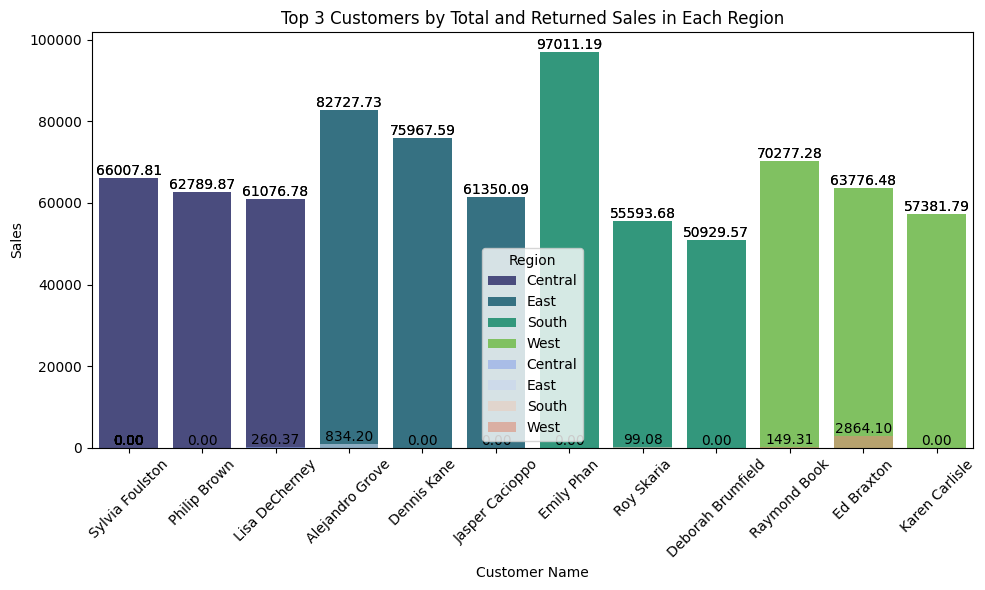

In [34]:
# Calculate the total sales for each customer in each region
total_sales = filtered_data.groupby(['Region', 'Customer_Name'])['Sales'].sum().reset_index()

# Get the top 3 customers with the highest total sales in each region
top_3_customers_sales = total_sales.sort_values(['Region', 'Sales'], ascending=[True, False]).groupby('Region').head(3)

# Calculate the sales of returns for each of the top 3 customers
return_sales = returns.groupby(['Region', 'Customer_Name'])['Sales'].sum().reset_index()

# Merge the total sales DataFrame with the return sales DataFrame for the top 3 customers
final_result = pd.merge(top_3_customers_sales, return_sales, on=['Region', 'Customer_Name'], how='left').fillna(0)
final_result = final_result.rename(columns={'Sales_x': 'Total Sales', 'Sales_y': 'Returned Sales'})

plt.figure(figsize=(10, 6))  # You can adjust the width and height as needed
# Draw the barplot
sns.barplot(data=final_result, x='Customer_Name', y='Total Sales', hue='Region', palette='viridis')

# Add labels to the bars for total sales
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

# Draw the barplot for returned sales on the same plot
sns.barplot(data=final_result, x='Customer_Name', y='Returned Sales', hue='Region', palette='coolwarm', alpha=0.6)

# Add labels to the bars for returned sales
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

# Plot settings
plt.title('Top 3 Customers by Total and Returned Sales in Each Region')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

"Top 3 Customers by Net Profit in Each Region"

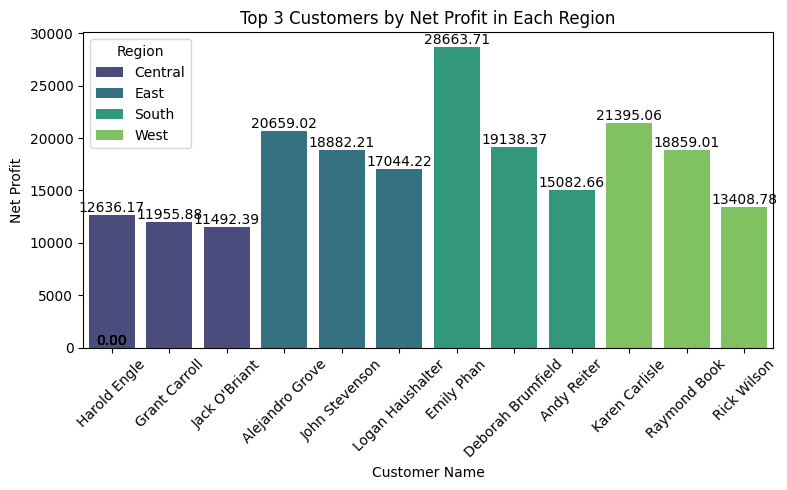

In [35]:

# Calculate the net profits for each customer in each region
net_profits = filtered_data.groupby(['Region', 'Customer_Name'])['Profit'].sum().reset_index()

# Get the top 3 customers with the highest net profits in each region
top_3_customers = net_profits.sort_values(['Region', 'Profit'], ascending=[True, False]).groupby('Region').head(3)


# Create the plot
plt.figure(figsize=(8, 5))

# Draw the barplot
sns.barplot(data=top_3_customers, x='Customer_Name', y='Profit', hue='Region', palette='viridis')

# Add labels to the bars
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom')

# Plot settings
plt.title('Top 3 Customers by Net Profit in Each Region')
plt.xlabel('Customer Name')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

"total sales & profit by  customer segment"

In [48]:

# Calculate total sales and total profit for each customer segment
segment_summary = filtered_data.groupby('Customer_Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Display results
print("Total Sales and Profit by Customer Segment:")
segment_summary

Total Sales and Profit by Customer Segment:


Customer_Segment   Total_Sales   Total_Profit
0         Consumer  2.847596e+06  263209.475824
1        Corporate  4.925748e+06  507877.730683
2      Home Office  3.162219e+06  295745.416211
3   Small Business  2.325183e+06  256502.397119

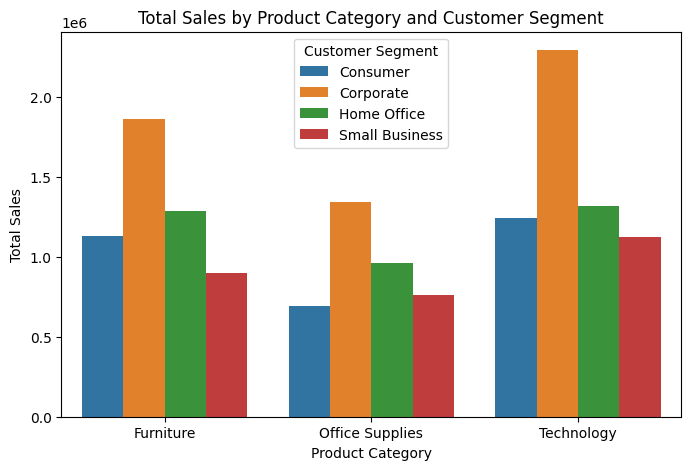

In [40]:
# Calculate total sales and total profit for each customer segment within each product category
category_segment_sales = merged_data.groupby(['Product_Category', 'Customer_Segment']).agg(
    Total_Sales=('Sales', 'sum'),
).reset_index()

# Plot total sales
plt.figure(figsize=(8, 5))
sns.barplot(data=category_segment_sales, x='Product_Category', y='Total_Sales', hue='Customer_Segment')
plt.title('Total Sales by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Customer Segment')
plt.show()

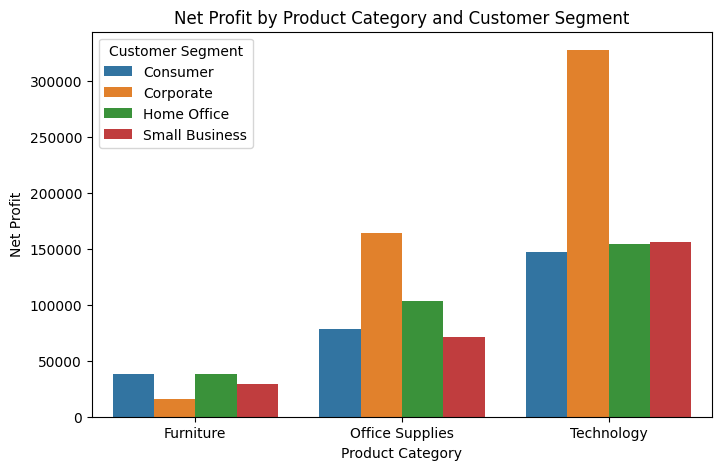

In [42]:
category_segment_profit = filtered_data.groupby(['Product_Category', 'Customer_Segment']).agg(
    Net_Profit=('Profit', 'sum')
).reset_index()
# Plot total profit
plt.figure(figsize=(8, 5))
sns.barplot(data=category_segment_profit, x='Product_Category', y='Net_Profit', hue='Customer_Segment')
plt.title('Net Profit by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Net Profit')
plt.legend(title='Customer Segment')
plt.show()


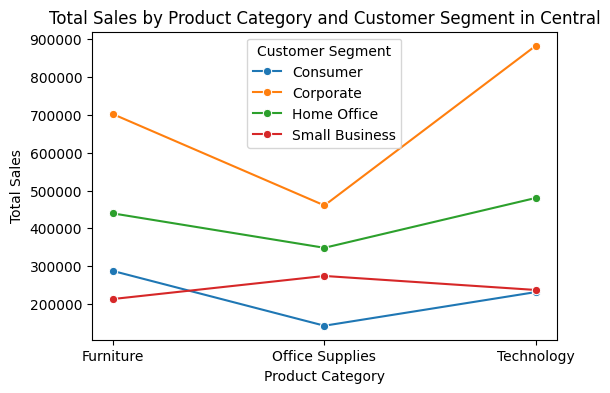

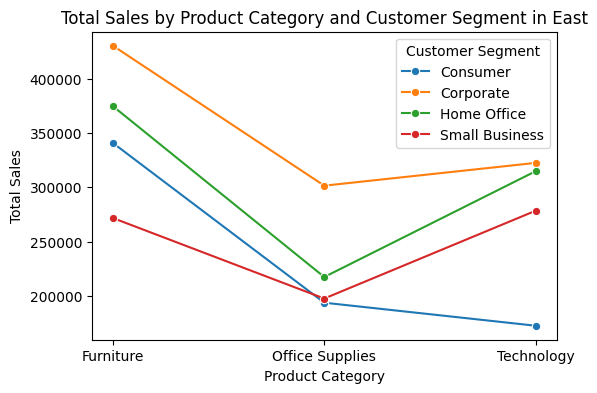

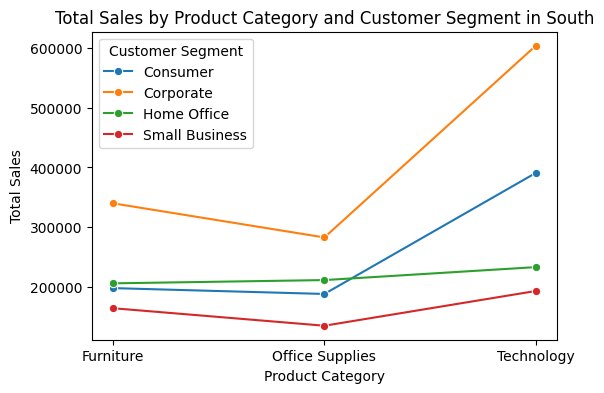

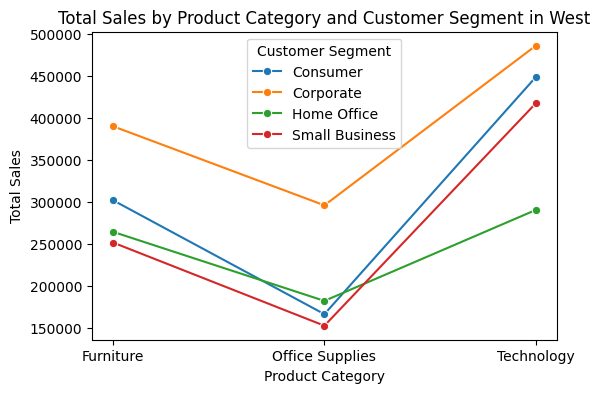

In [46]:
# Calculate total sales and total profit for each customer segment within each region and product category
region_category_segment_sales = merged_data.groupby(['Region', 'Product_Category', 'Customer_Segment']).agg(
    Total_Sales=('Sales', 'sum'),
).reset_index()
# Plot total sales for each region
for region in region_category_segment_sales['Region'].unique():
    regional_data = region_category_segment_sales[region_category_segment_sales['Region'] == region]
    
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=regional_data, x='Product_Category', y='Total_Sales', hue='Customer_Segment', marker='o')
    plt.title(f'Total Sales by Product Category and Customer Segment in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales')
    plt.legend(title='Customer Segment')
    plt.show()

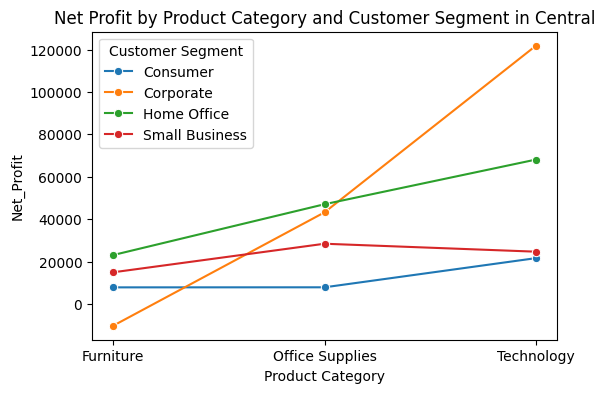

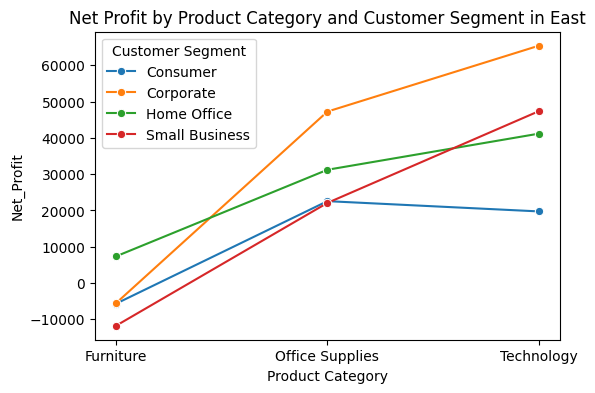

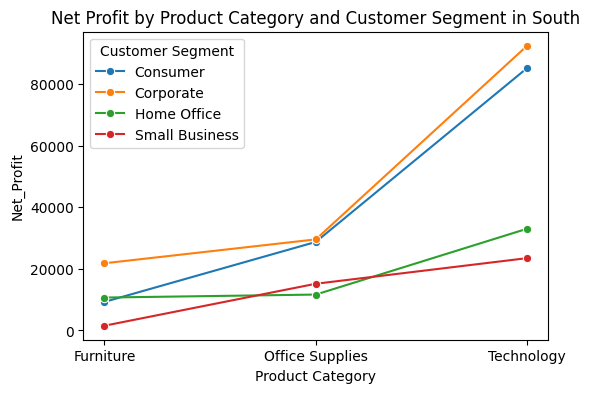

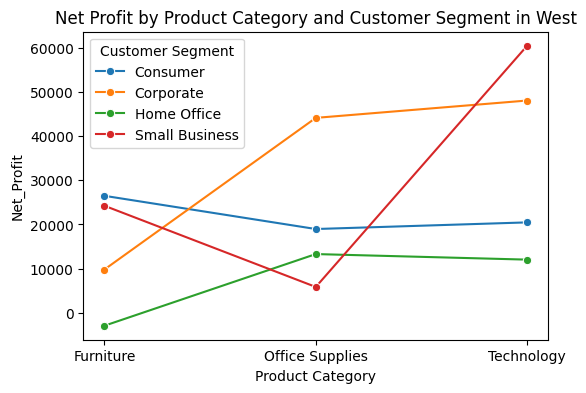

In [47]:
# Calculate total sales and total profit for each customer segment within each region and product category
region_category_segment_Profit = filtered_data.groupby(['Region', 'Product_Category', 'Customer_Segment']).agg(
    Net_Profit=('Profit', 'sum')
).reset_index()
# Plot total sales f



# Plot total profit for each region
for region in region_category_segment_Profit['Region'].unique():
    regional_data = region_category_segment_Profit[region_category_segment_Profit['Region'] == region]
    
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=regional_data, x='Product_Category', y='Net_Profit', hue='Customer_Segment', marker='o')
    plt.title(f'Net Profit by Product Category and Customer Segment in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Net_Profit')
    plt.legend(title='Customer Segment')
    plt.show()


## "location"

In [48]:
# Calculate total sales, total profit, total orders, and total returns for each region
region_summary = merged_data.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Orders=('Order_ID', 'count'),
    Total_Returns=('Order_ID', lambda x: (merged_data.loc[x.index, 'Status'] == 'Returned').sum())
).reset_index()

# Display results
print("Total Sales, Profit, Orders, and Returns by Region:")
region_summary


Total Sales, Profit, Orders, and Returns by Region:


Region   Total_Sales   Total_Profit  Total_Orders  Total_Returns
0  Central  4.699167e+06  481891.243340          2710            270
1     East  3.416466e+06  317852.044341          1895            184
2    South  3.150219e+06  422507.111600          1838            202
3     West  3.649748e+06  299517.560300          1956            216

"Top 10 states by Sales and Net Profit"

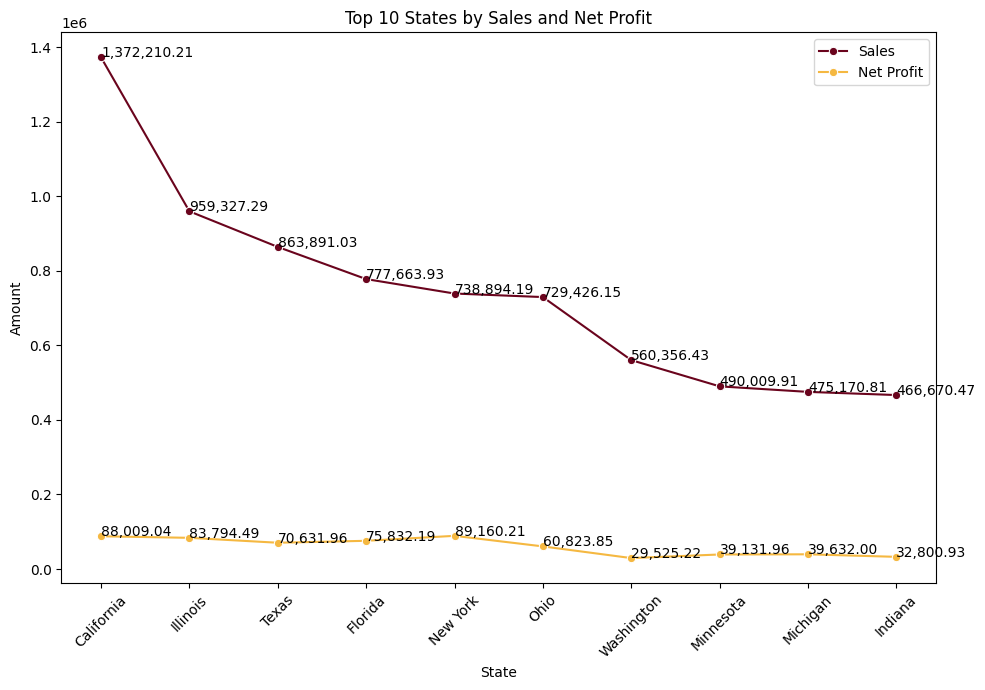

In [50]:
# Calculate total sales for each state
State_summary_sales = merged_data.groupby('State').agg({'Sales': 'sum'}).reset_index()

# Calculate total profit for each state (excluding returned orders)
State_summary_profit = filtered_data.groupby('State').agg({'Profit': 'sum'}).reset_index()

# Merge sales and profit data
State_summary = pd.merge(State_summary_sales, State_summary_profit, on='State')

# Identify Top 10 states by sales
top_10_State = State_summary.nlargest(10, 'Sales')

# Function to add numbers on line plots
def add_numbers(ax, data, x_col, y_col):
    for line in range(data.shape[0]):
        ax.text(data[x_col].iloc[line], data[y_col].iloc[line], format(data[y_col].iloc[line], ',.2f'),
                horizontalalignment='left', size='medium', color='black', weight='normal')

# Plotting the data for Top 10 states
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x='State', y='Sales', data=top_10_State, marker='o', label='Sales', ax=ax, color='#6a041d')
sns.lineplot(x='State', y='Profit', data=top_10_State, marker='o', label='Net Profit', ax=ax, color='#f5b841')
add_numbers(ax, top_10_State, 'State', 'Sales')
add_numbers(ax, top_10_State, 'State', 'Profit')
ax.set_title('Top 10 States by Sales and Net Profit')
ax.set_ylabel('Amount')
ax.set_xlabel('State')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"Top 10 Cities by Sales and Net Profit"

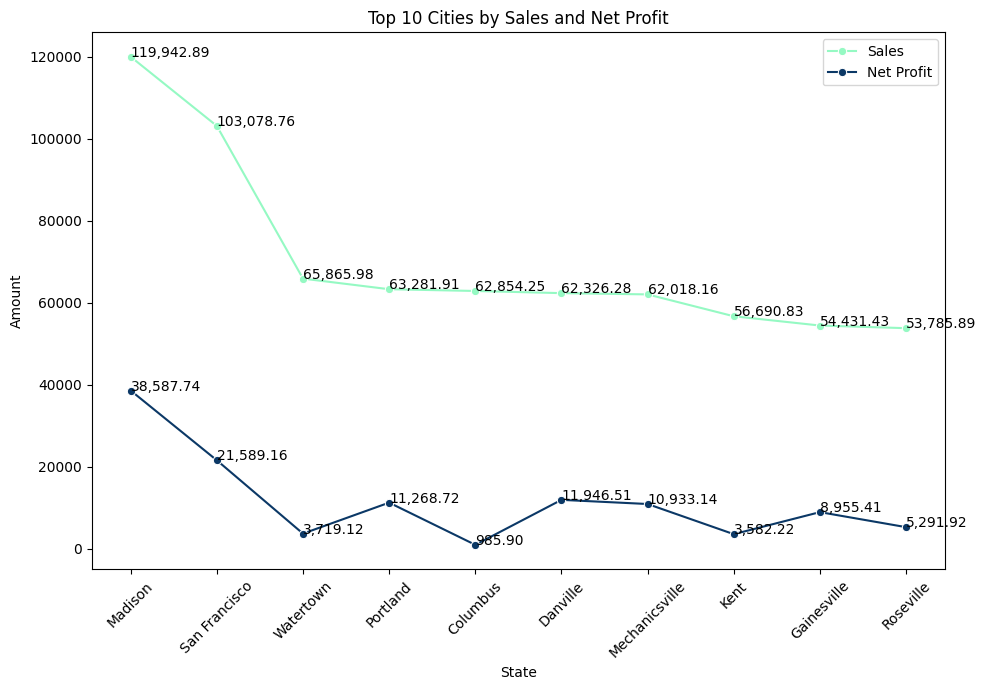

In [52]:
# Calculate total sales for each state
State_summary_sales = merged_data.groupby('City').agg({'Sales': 'sum'}).reset_index()

# Calculate total profit for each state (excluding returned orders)
State_summary_profit = filtered_data.groupby('City').agg({'Profit': 'sum'}).reset_index()

# Merge sales and profit data
State_summary = pd.merge(State_summary_sales, State_summary_profit, on='City')

# Identify Top 10 states by sales
top_10_State = State_summary.nlargest(10, 'Sales')

# Function to add numbers on line plots
def add_numbers(ax, data, x_col, y_col):
    for line in range(data.shape[0]):
        ax.text(data[x_col].iloc[line], data[y_col].iloc[line], format(data[y_col].iloc[line], ',.2f'),
                horizontalalignment='left', size='medium', color='black', weight='normal')

# Plotting the data for Top 10 states
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x='City', y='Sales', data=top_10_State, marker='o', label='Sales', ax=ax, color='#95f9c3')
sns.lineplot(x='City', y='Profit', data=top_10_State, marker='o', label='Net Profit', ax=ax, color='#0b3866')
add_numbers(ax, top_10_State, 'City', 'Sales')
add_numbers(ax, top_10_State, 'City', 'Profit')
ax.set_title('Top 10 Cities by Sales and Net Profit')
ax.set_ylabel('Amount')
ax.set_xlabel('State')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## "FORCASTING QUESTIONS "

"SALES & PROFIT  FOR NEXT 6 MONTHES"


C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\3610106204.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



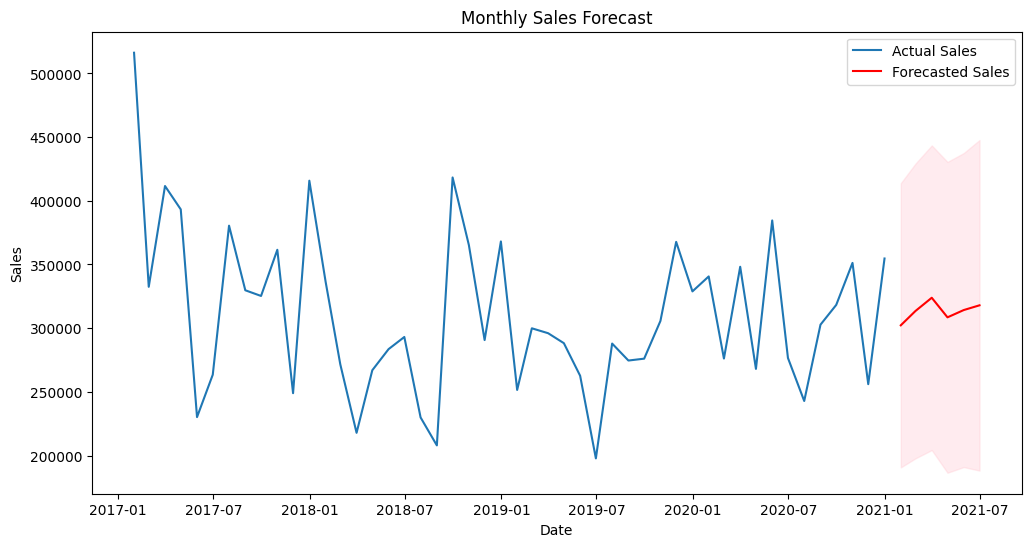

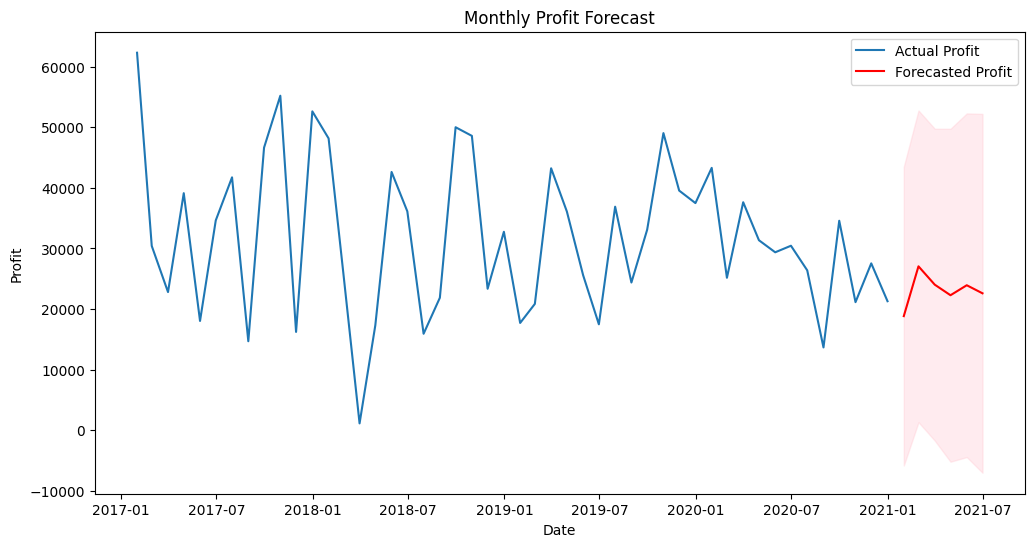

In [53]:
# Parse Order Date
super_store['Order_Date'] = pd.to_datetime(super_store['Order_Date'])

# Resample sales and profits data on a monthly basis
monthly_data = super_store.set_index('Order_Date').resample('M').agg({'Sales': 'sum', 'Profit': 'sum'})

# Remove any potential NaN values
monthly_data = monthly_data.dropna()

# Fit ARIMA model for Sales
model_sales = sm.tsa.ARIMA(monthly_data['Sales'], order=(5, 1, 0))
model_fit_sales = model_sales.fit()

# Forecast Sales
forecast_sales = model_fit_sales.get_forecast(steps=6)
forecast_series_sales = forecast_sales.predicted_mean
conf_int_sales = forecast_sales.conf_int()

# Fit ARIMA model for Profit
model_profit = sm.tsa.ARIMA(monthly_data['Profit'], order=(5, 1, 0))
model_fit_profit = model_profit.fit()

# Forecast Profit
forecast_profit = model_fit_profit.get_forecast(steps=6)
forecast_series_profit = forecast_profit.predicted_mean
conf_int_profit = forecast_profit.conf_int()

# Plot Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Sales'], label='Actual Sales')
plt.plot(forecast_series_sales, label='Forecasted Sales', color='red')
plt.fill_between(forecast_series_sales.index, conf_int_sales.iloc[:, 0], conf_int_sales.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot Profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Profit'], label='Actual Profit')
plt.plot(forecast_series_profit, label='Forecasted Profit', color='red')
plt.fill_between(forecast_series_profit.index, conf_int_profit.iloc[:, 0], conf_int_profit.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Profit Forecast')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

"CATEGORIES SALES FOR NEXT 6 MONTHES"


C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\2202525438.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



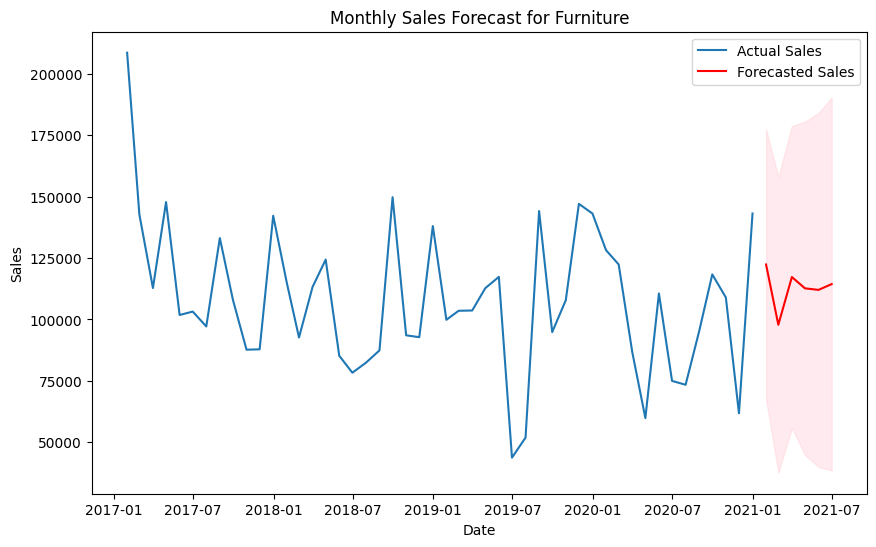

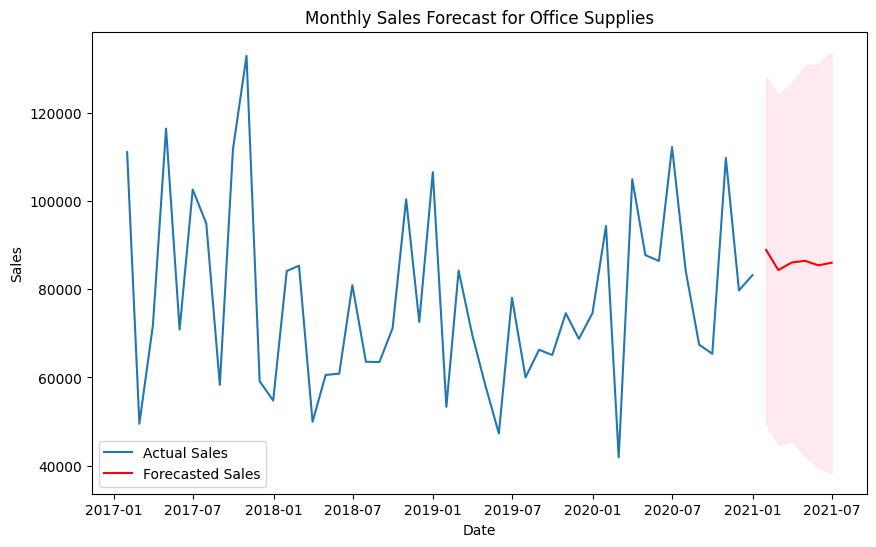

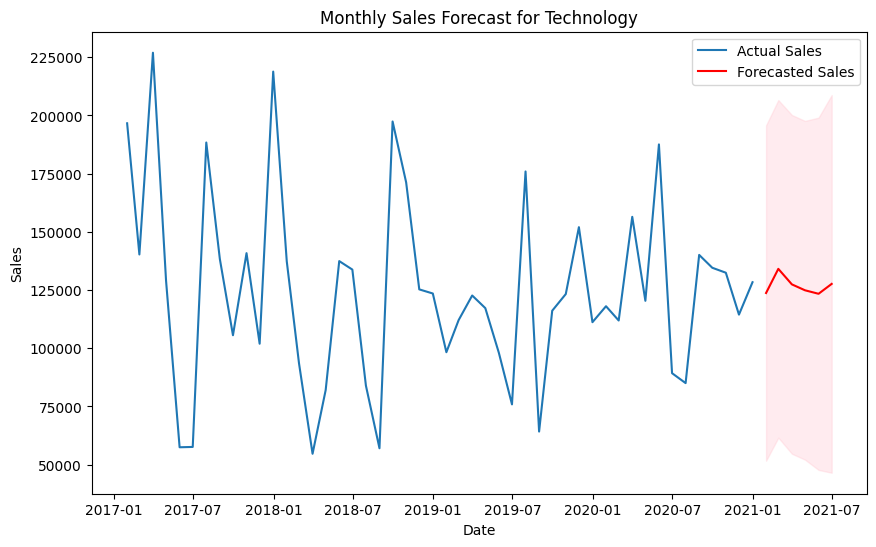

In [54]:
# Resample sales data by Product Category on a monthly basis
category_sales = super_store.groupby(['Product_Category', pd.Grouper(key='Order_Date', freq='M')])['Sales'].sum().unstack('Product_Category')

# Plot and forecast each product category
for category in category_sales.columns:
    sales = category_sales[category].dropna()
    model = sm.tsa.ARIMA(sales, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=6)
    forecast_series = forecast.predicted_mean
    conf_int = forecast.conf_int()

    plt.figure(figsize=(10, 6))
    plt.plot(sales, label='Actual Sales')
    plt.plot(forecast_series, label='Forecasted Sales', color='red')
    plt.fill_between(forecast_series.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Monthly Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

"CATEGORIES PROFITS FOR NEXT 6 MONTHES"


C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\4150213973.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



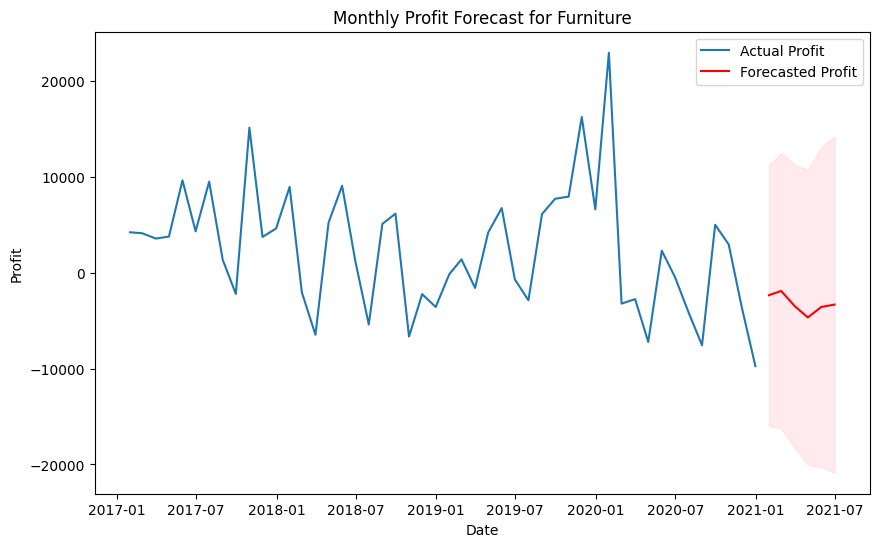

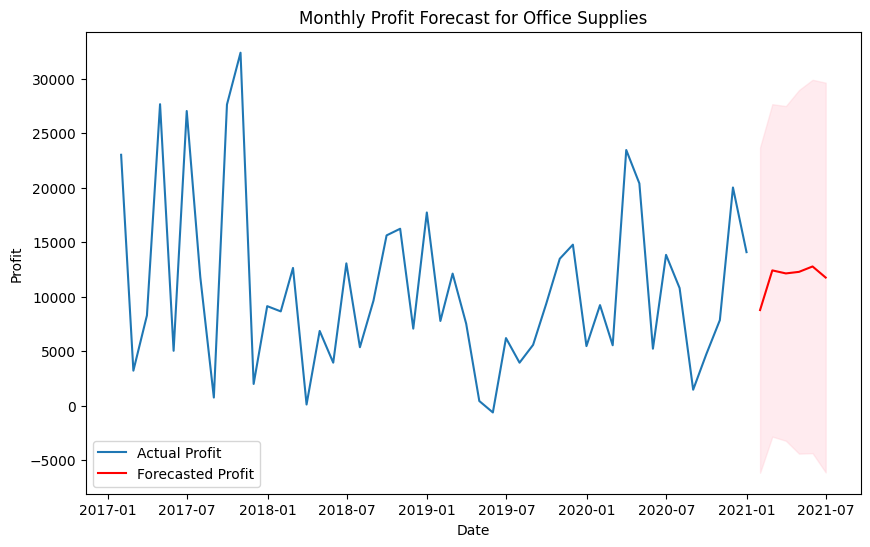

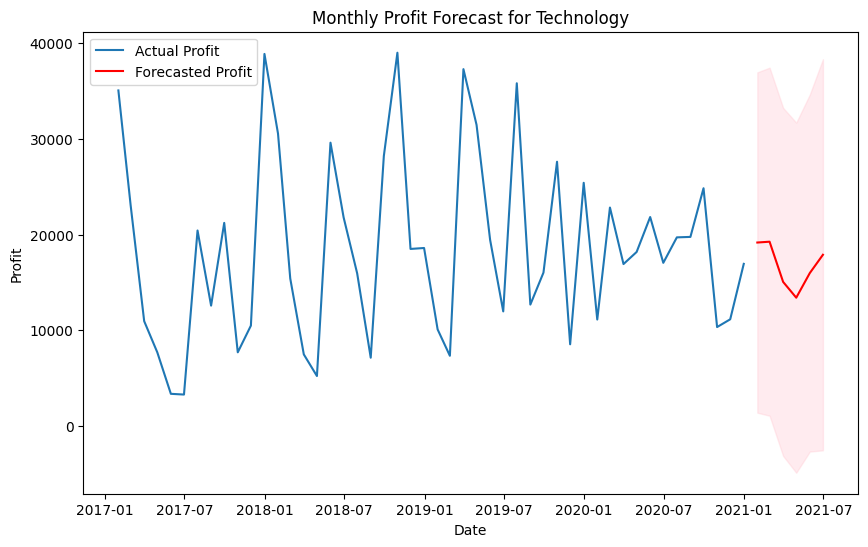

In [55]:
# Parse Order Date
super_store['Order_Date'] = pd.to_datetime(super_store['Order_Date'])

# Resample profit data by Product Category on a monthly basis
category_profit = super_store.groupby(['Product_Category', pd.Grouper(key='Order_Date', freq='M')])['Profit'].sum().unstack('Product_Category')

# Plot and forecast each product category
for category in category_profit.columns:
    profit = category_profit[category].dropna()
    model = sm.tsa.ARIMA(profit, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=6)
    forecast_series = forecast.predicted_mean
    conf_int = forecast.conf_int()

    plt.figure(figsize=(10, 6))
    plt.plot(profit, label='Actual Profit')
    plt.plot(forecast_series, label='Forecasted Profit', color='red')
    plt.fill_between(forecast_series.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Monthly Profit Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

"REGIONS SALES & PROFITS FOR NEXT 6 MONTHES"

C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\2618432346.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



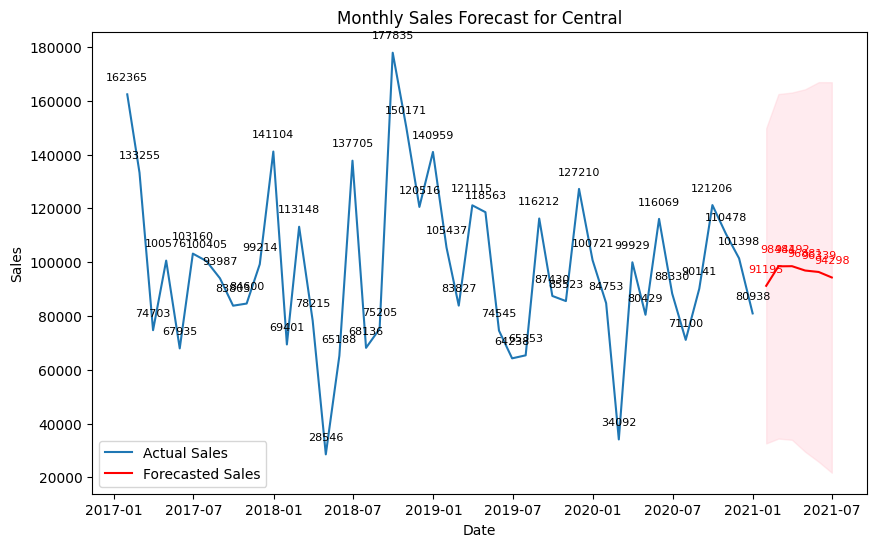

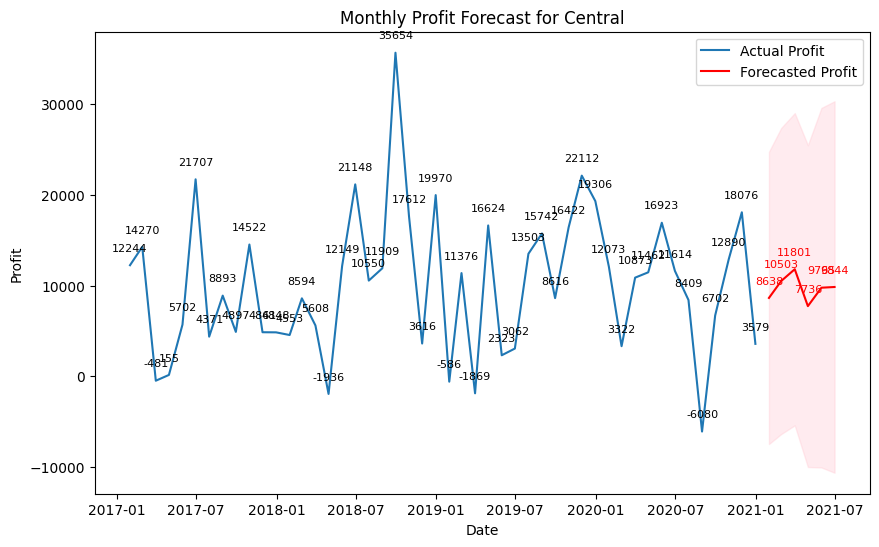

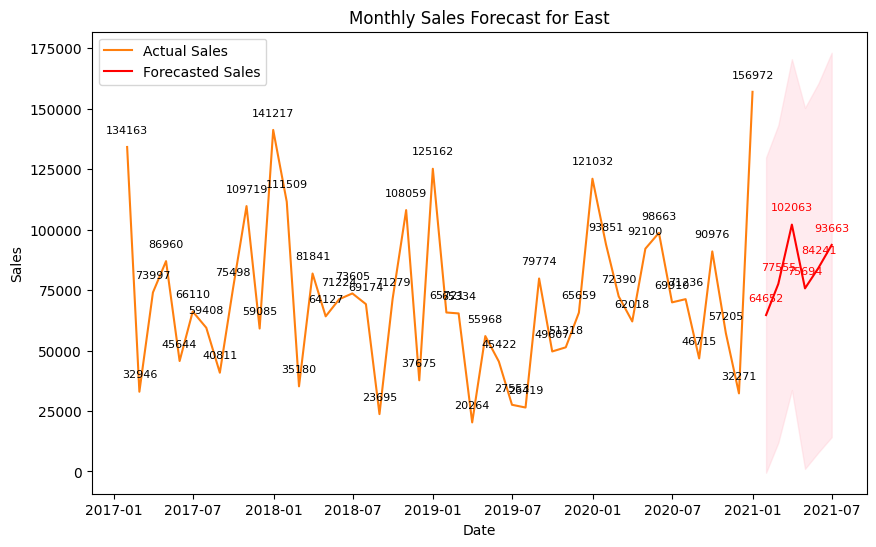

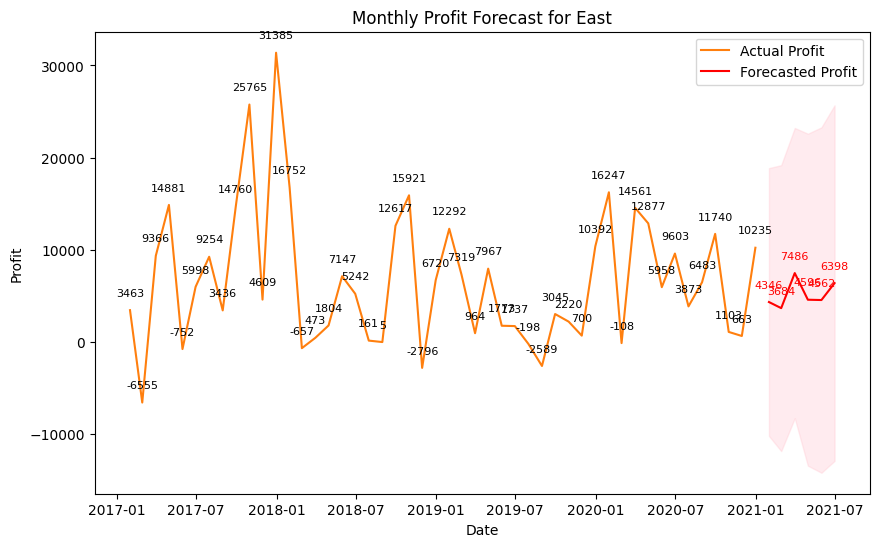

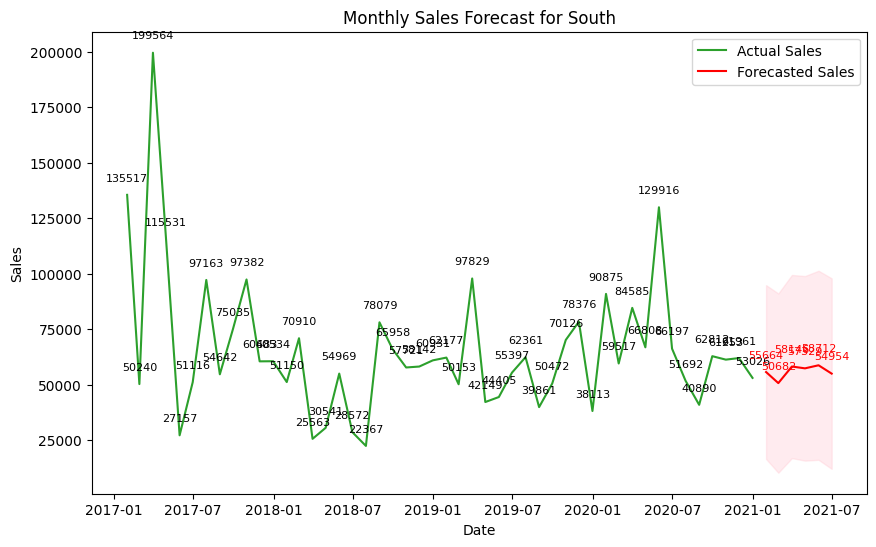

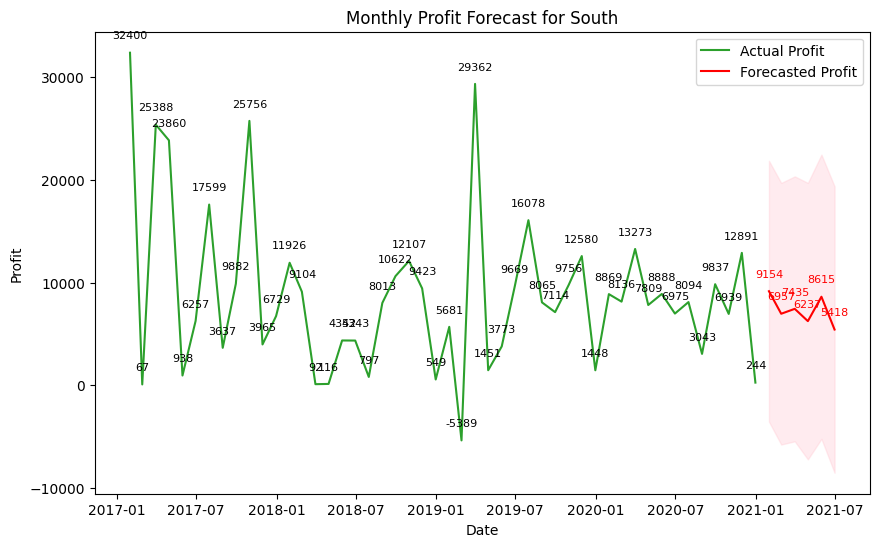

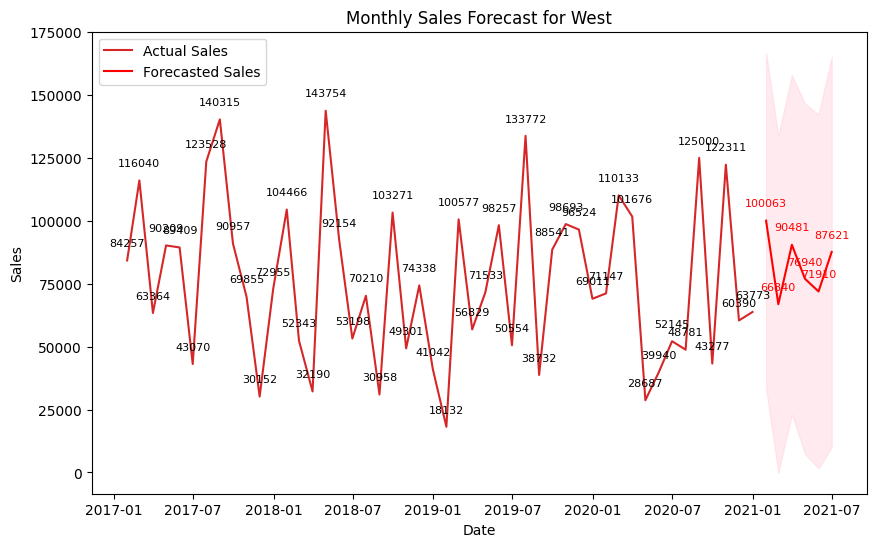

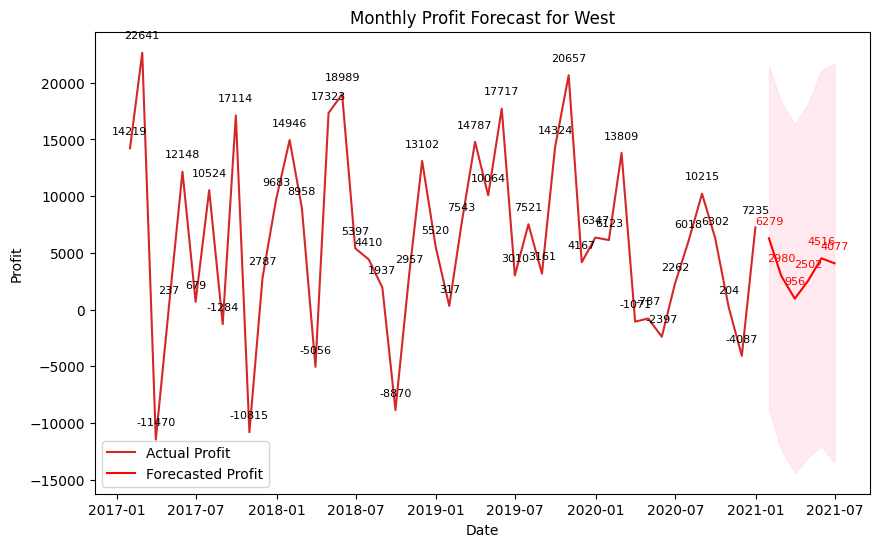

In [56]:
# Resample sales and profits by Region on a monthly basis
region_sales_profits = super_store.groupby(['Region', pd.Grouper(key='Order_Date', freq='M')]).agg({'Sales': 'sum', 'Profit': 'sum'})

# Define colors for each region
colors = plt.get_cmap('tab10')

# Forecast for each region
for idx, region in enumerate(region_sales_profits.index.get_level_values('Region').unique()):
    region_data = region_sales_profits.loc[region]

    for column in ['Sales', 'Profit']:
        data = region_data[column].dropna()
        model = sm.tsa.ARIMA(data, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=6)
        forecast_series = forecast.predicted_mean
        conf_int = forecast.conf_int()

        plt.figure(figsize=(10, 6))
        plt.plot(data, label=f'Actual {column}', color=colors(idx))
        plt.plot(forecast_series, label=f'Forecasted {column}', color='red')
        plt.fill_between(forecast_series.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

        # Annotate actual data
        for x, y in data.items():
            plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

        # Annotate forecasted data
        for x, y in forecast_series.items():
            plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

        plt.title(f'Monthly {column} Forecast for {region}')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()

"CUSTOMERS SEGMENT ORDERS FOR NEXT 6 MONTHES"

C:\Users\compumarts\AppData\Local\Temp\ipykernel_15484\1587549052.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



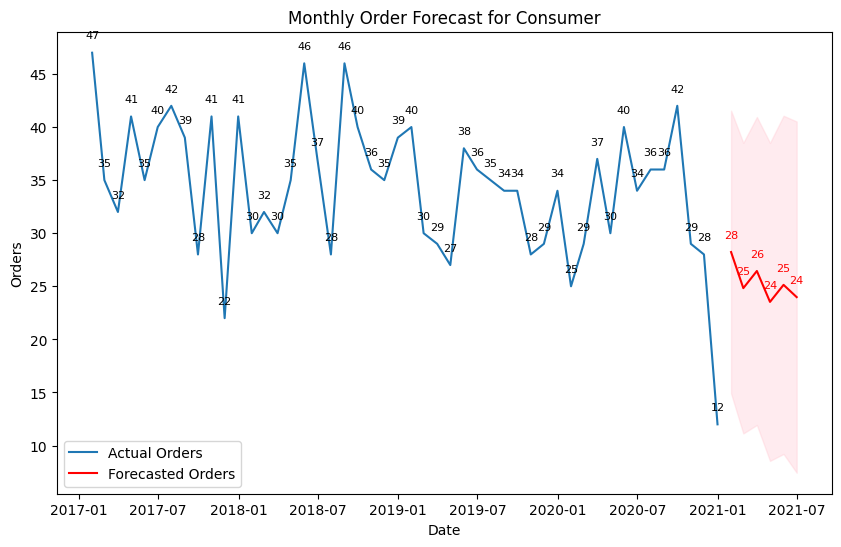

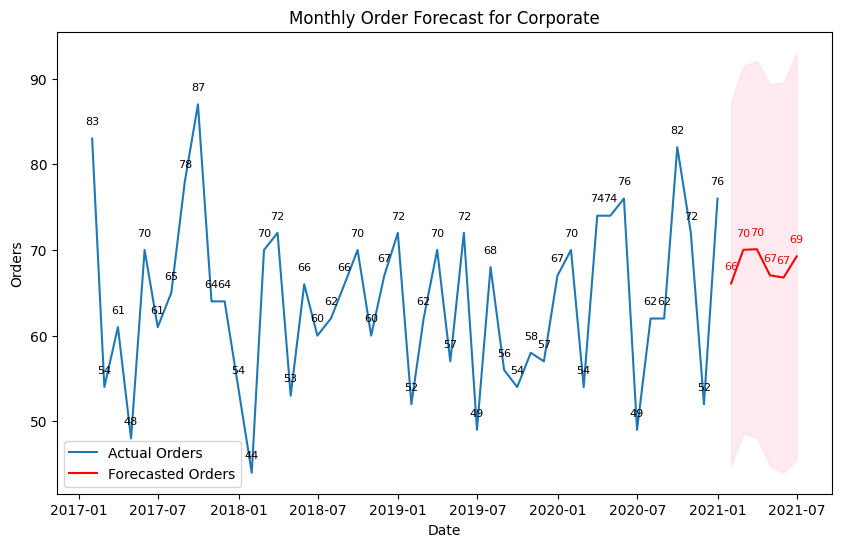

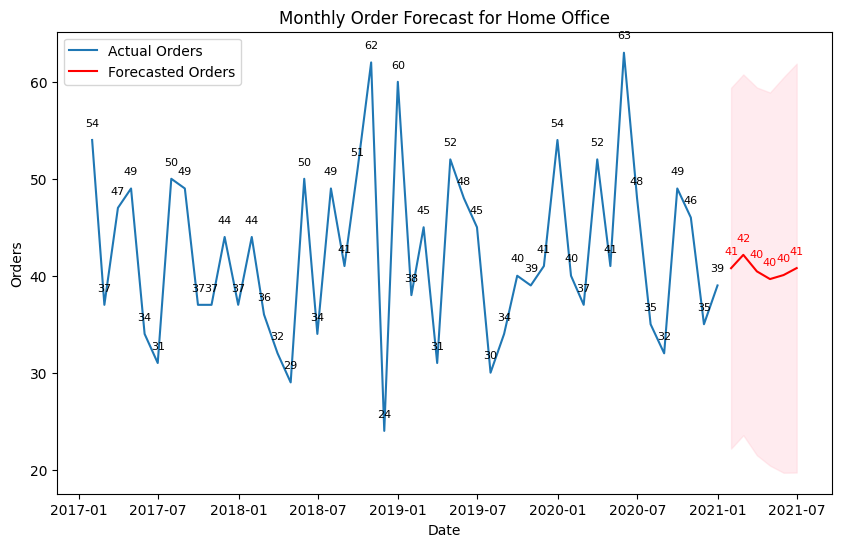

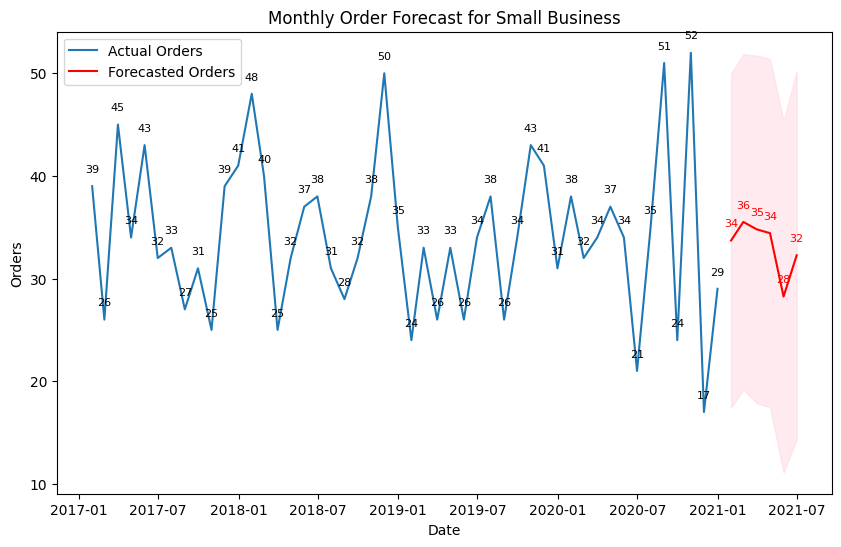

In [57]:
# Resample order data by Customer Segment on a monthly basis
order_category = super_store.groupby(['Customer_Segment', pd.Grouper(key='Order_Date', freq='M')])['Order_ID'].count().unstack('Customer_Segment')

# Plot and forecast each customer segment
for segment in order_category.columns:
    orders = order_category[segment].dropna()
    model = sm.tsa.ARIMA(orders, order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=6)
    forecast_series = forecast.predicted_mean
    conf_int = forecast.conf_int()

    plt.figure(figsize=(10, 6))
    plt.plot(orders, label='Actual Orders')
    plt.plot(forecast_series, label='Forecasted Orders', color='red')
    plt.fill_between(forecast_series.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

    # Annotate actual orders
    for x, y in orders.items():
        plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

    # Annotate forecasted orders
    for x, y in forecast_series.items():
        plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    plt.title(f'Monthly Order Forecast for {segment}')
    plt.xlabel('Date')
    plt.ylabel('Orders')
    plt.legend()
    plt.show()